In [1]:
import pandas as pd
import numpy as np
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mordred = pd.read_csv("Prediction_human_from_mordred_fs.csv")
mordred["method"] = "mordred"


morgan = pd.read_csv("Prediction_human_from_morgan_fs.csv")
morgan["method"] = "morgan"


mordred_animal = pd.read_csv("Prediction_human_from_mordred_fs_animal_artificial.csv")
mordred_animal["method"] = "mordred_animal"

morgan_animal = pd.read_csv("Prediction_human_from_morgan_fs_animal_artificial.csv")
morgan_animal["method"] = "morgan_animal"

mordred_morgan = pd.read_csv("Prediction_human_from_mordred_morgan_fs.csv")
mordred_morgan["method"] = "mordred_morgan"


mordred_morgan_p = pd.read_csv("Prediction_human_from_mordred_morgan_fs_animal_artificial.csv")
mordred_morgan_p["method"] = "mordred_morgan_p(animal)"

mordred_morgan_p_r = pd.read_csv("Prediction_human_from_mordred_morgan_fs_animal_artificial_and_real.csv")
mordred_morgan_p_r["method"] = "mordred_morgan_p(animal)_real(animal)"

mean_predictor = pd.read_csv("Prediction_human_mean_predictor.csv")
mean_predictor["method"] = "mean_predictor"

p_r = pd.read_csv("Prediction_human_from_animal_artificial_and_real_only.csv")
p_r["method"] = "p(animal)_real(animal)_only"

In [3]:
df = pd.concat([mean_predictor, mordred,morgan,mordred_morgan,mordred_animal, morgan_animal, mordred_morgan_p,mordred_morgan_p_r,p_r  ]).reset_index(drop=True)
df

HeldOut         endpoint  random_state  split     fold_2     fold_3  \
0     HeldOut  human_VDss_L_kg            42      0  40.000000  48.400000   
1     HeldOut  human_VDss_L_kg            42      1  36.000000  52.400000   
2     HeldOut  human_VDss_L_kg            42      2  34.000000  49.600000   
3     HeldOut  human_VDss_L_kg            42      3  36.400000  52.000000   
4     HeldOut  human_VDss_L_kg            42      4  35.742972  50.602410   
...       ...              ...           ...    ...        ...        ...   
1120  HeldOut      human_thalf            46      0  45.059289  64.031621   
1121  HeldOut      human_thalf            46      1  46.640316  71.541502   
1122  HeldOut      human_thalf            46      2  48.616601  69.169960   
1123  HeldOut      human_thalf            46      3  43.478261  64.031621   
1124  HeldOut      human_thalf            46      4  44.664032  63.241107   

         fold_5      gmfe       mfe      bias      rmse        r2  \
0     67.200000  3.336014  1.666229  0.117729  0.656861  0.000000   
1     74.800000  3.176437  1.560619  0.064162  0.611018  0.000000   
2     68.800000  3.387114  1.655843  0.146752  0.659072  0.000000   
3     67.600000  3.315049  1.587130  0.075410  0.647149  0.000000   
4     71.485944  3.241827  1.595411  0.117378  0.621148  0.000000   
...         ...       ...       ...       ...       ...       ...   
1120  82.213439  2.687496  1.433985 -0.617706  0.559653  0.177793   
1121  86.166008  2.415307  1.368476  0.284550  0.500536  0.221786   
1122  86.561265  2.494804  1.360849  0.205715  0.534131  0.222912   
1123  81.422925  2.794156  1.422087  0.453924  0.593219  0.242573   
1124  83.003953  2.692060  1.414319  0.168612  0.557666  0.230454   

                           method  
0                  mean_predictor  
1                  mean_predictor  
2                  mean_predictor  
3                  mean_predictor  
4                  mean_predictor  
...                           ...  
1120  p(animal)_real(animal)_only  
1121  p(animal)_real(animal)_only  
1122  p(animal)_real(animal)_only  
1123  p(animal)_real(animal)_only  
1124  p(animal)_real(animal)_only  

[1125 rows x 13 columns]

In [4]:
results=df.groupby(["endpoint","method"]).median().round(2).reset_index()
results

endpoint                                 method  random_state  \
0   human_CL_mL_min_kg                         mean_predictor          44.0   
1   human_CL_mL_min_kg                                mordred          44.0   
2   human_CL_mL_min_kg                         mordred_animal          44.0   
3   human_CL_mL_min_kg                         mordred_morgan          44.0   
4   human_CL_mL_min_kg               mordred_morgan_p(animal)          44.0   
5   human_CL_mL_min_kg  mordred_morgan_p(animal)_real(animal)          44.0   
6   human_CL_mL_min_kg                                 morgan          44.0   
7   human_CL_mL_min_kg                          morgan_animal          44.0   
8   human_CL_mL_min_kg            p(animal)_real(animal)_only          44.0   
9      human_VDss_L_kg                         mean_predictor          44.0   
10     human_VDss_L_kg                                mordred          44.0   
11     human_VDss_L_kg                         mordred_animal          44.0   
12     human_VDss_L_kg                         mordred_morgan          44.0   
13     human_VDss_L_kg               mordred_morgan_p(animal)          44.0   
14     human_VDss_L_kg  mordred_morgan_p(animal)_real(animal)          44.0   
15     human_VDss_L_kg                                 morgan          44.0   
16     human_VDss_L_kg                          morgan_animal          44.0   
17     human_VDss_L_kg            p(animal)_real(animal)_only          44.0   
18           human_fup                         mean_predictor          44.0   
19           human_fup                                mordred          44.0   
20           human_fup                         mordred_animal          44.0   
21           human_fup                         mordred_morgan          44.0   
22           human_fup               mordred_morgan_p(animal)          44.0   
23           human_fup  mordred_morgan_p(animal)_real(animal)          44.0   
24           human_fup                                 morgan          44.0   
25           human_fup                          morgan_animal          44.0   
26           human_fup            p(animal)_real(animal)_only          44.0   
27           human_mrt                         mean_predictor          44.0   
28           human_mrt                                mordred          44.0   
29           human_mrt                         mordred_animal          44.0   
30           human_mrt                         mordred_morgan          44.0   
31           human_mrt               mordred_morgan_p(animal)          44.0   
32           human_mrt  mordred_morgan_p(animal)_real(animal)          44.0   
33           human_mrt                                 morgan          44.0   
34           human_mrt                          morgan_animal          44.0   
35           human_mrt            p(animal)_real(animal)_only          44.0   
36         human_thalf                         mean_predictor          44.0   
37         human_thalf                                mordred          44.0   
38         human_thalf                         mordred_animal          44.0   
39         human_thalf                         mordred_morgan          44.0   
40         human_thalf               mordred_morgan_p(animal)          44.0   
41         human_thalf  mordred_morgan_p(animal)_real(animal)          44.0   
42         human_thalf                                 morgan          44.0   
43         human_thalf                          morgan_animal          44.0   
44         human_thalf            p(animal)_real(animal)_only          44.0   

    split  fold_2  fold_3  fold_5  gmfe   mfe  bias  rmse    r2  
0     2.0   36.33   59.38   77.43  3.15  1.48 -0.55  0.64  0.00  
1     2.0   49.81   69.53   84.38  2.49  1.35 -0.28  0.54  0.28  
2     2.0   50.39   70.31   84.38  2.46  1.35 -0.22  0.53  0.30  
3     2.0   50.39   70.31   84.38  2.48  1.35 -0.29  0.53  0.30  
4     2.0   50.78   70.31   85.16  2.45  1.35 -0.

In [5]:
results.to_csv("results_Median_evaluation_metrics_9_models.csv")

r2
human_VDss_L_kg
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:1.001e-13 t=-1.506e+01


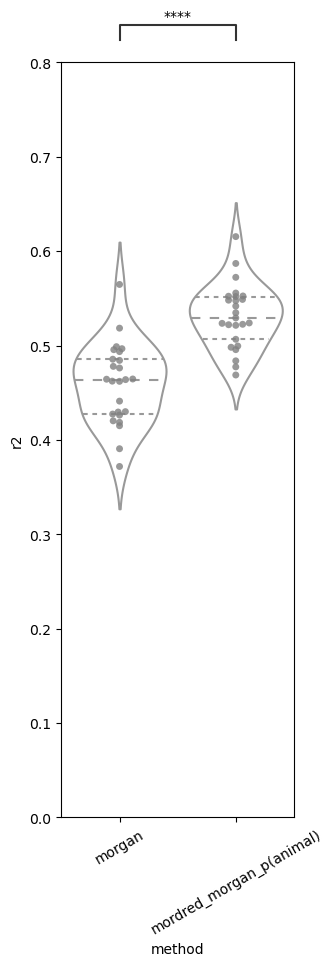

human_CL_mL_min_kg
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:2.670e-06 t=-6.099e+00


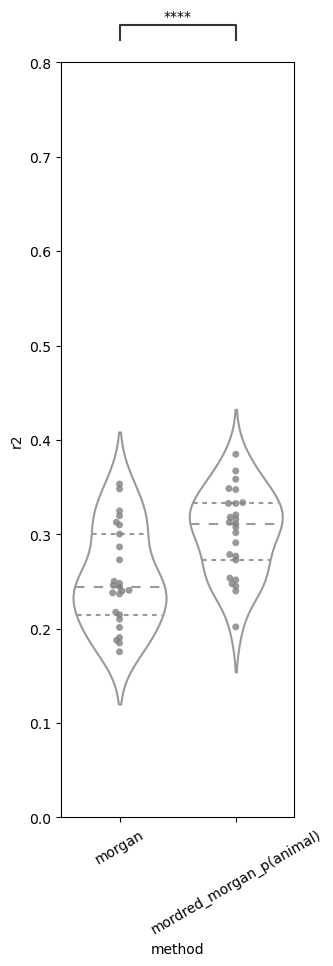

human_fup
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:5.452e-22 t=-3.459e+01


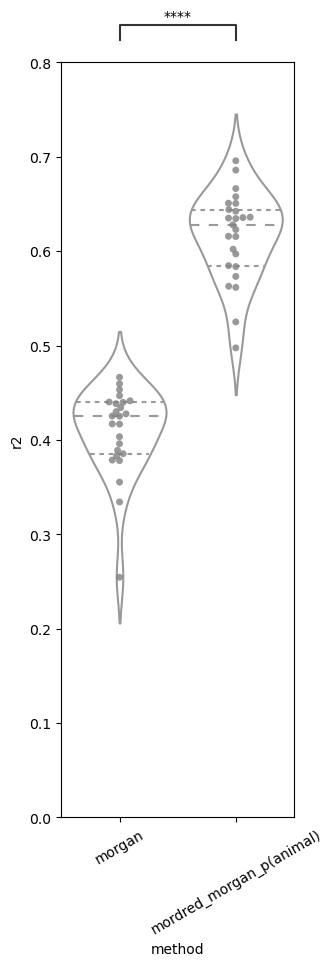

human_mrt
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:5.810e-06 t=-5.784e+00


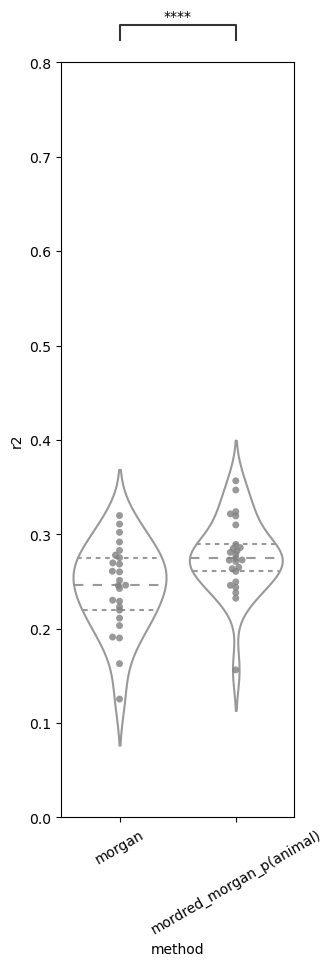

human_thalf
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:1.113e-10 t=-1.078e+01


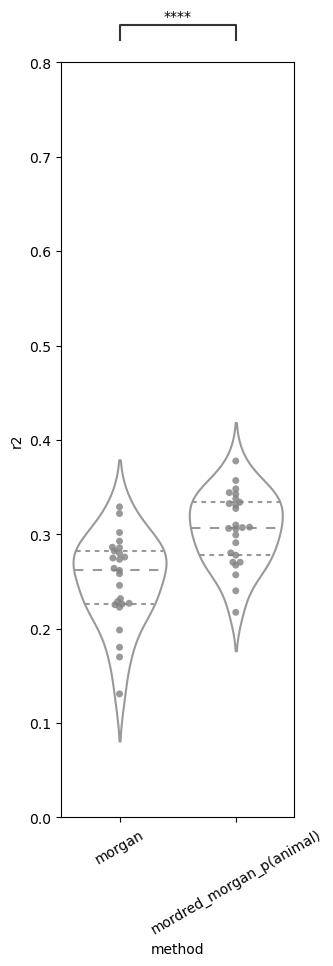

In [6]:
for metric in ["r2"]:

    print(metric)
    
    for endpoint in  ["human_VDss_L_kg","human_CL_mL_min_kg", "human_fup", "human_mrt", "human_thalf"]:

        print(endpoint)
        pairs= [("mordred_morgan_p(animal)", "morgan")]

        my_order= ["morgan","mordred_morgan_p(animal)"]


        fig, ax = plt.subplots(figsize=(3, 10), dpi=100)

        g = sns.violinplot(ax=ax,x='method', y=metric, data=df[df["endpoint"]==endpoint], scale='width', inner='quartile', order=my_order, color="white")
        g = sns.swarmplot(ax=ax,x='method', y=metric, data=df[df["endpoint"]==endpoint], order=my_order,color="grey", alpha=0.8)
        g.set_xticklabels(g.get_xticklabels(), rotation=30)        
        ax.set_ylim(0, 0.8)
        
        annotator = Annotator(ax=ax, pairs = pairs, data=df[df["endpoint"]==endpoint], x="method", y=metric, order=my_order)
        annotator.configure(test='t-test_paired', text_format='star', loc='outside')
        annotator.apply_and_annotate()

        plt.show()


rmse
human_VDss_L_kg
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mordred vs. mordred_animal: t-test paired samples, P_val:3.829e-08 t=7.913e+00
morgan vs. morgan_animal: t-test paired samples, P_val:1.601e-12 t=1.324e+01
mordred_morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:5.060e-07 t=6.789e+00
mordred vs. mordred_morgan: t-test paired samples, P_val:4.792e-02 t=2.085e+00
morgan vs. mordred: t-test paired samples, P_val:4.880e-12 t=1.255e+01
mordred_animal vs. mordred_morgan_p(animal): t-test paired samples, P_val:4.266e-01 t=8.087e-01
morgan vs. mordred_morgan: t-test paired samples, P_val:1.322e-13 t=1.486e+01
morgan_animal vs. mordred_morgan_p(animal): t-test paired samples, P_val:3.899e-01 t=8.757e-01
morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:1.806e-14 t=1.628e+01


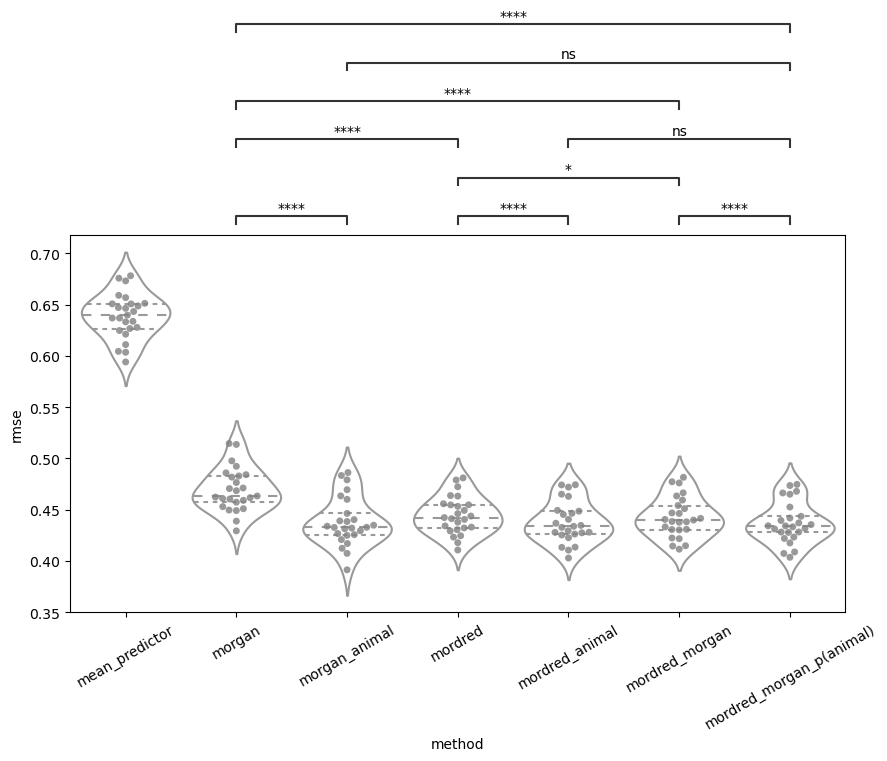

human_CL_mL_min_kg
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mordred vs. mordred_animal: t-test paired samples, P_val:8.377e-06 t=5.637e+00
morgan vs. morgan_animal: t-test paired samples, P_val:4.990e-09 t=8.856e+00
mordred_morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:2.247e-04 t=4.336e+00
mordred vs. mordred_morgan: t-test paired samples, P_val:4.007e-03 t=3.182e+00
morgan vs. mordred: t-test paired samples, P_val:5.748e-04 t=3.966e+00
mordred_animal vs. mordred_morgan_p(animal): t-test paired samples, P_val:9.118e-03 t=2.837e+00
morgan vs. mordred_morgan: t-test paired samples, P_val:2.633e-05 t=5.181e+00
morgan_animal vs. mordred_morgan_p(animal): t-test paired samples, P_val:8.556e-02 t=-1.793e+00
morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:2.335e-06 t=6.154e+00


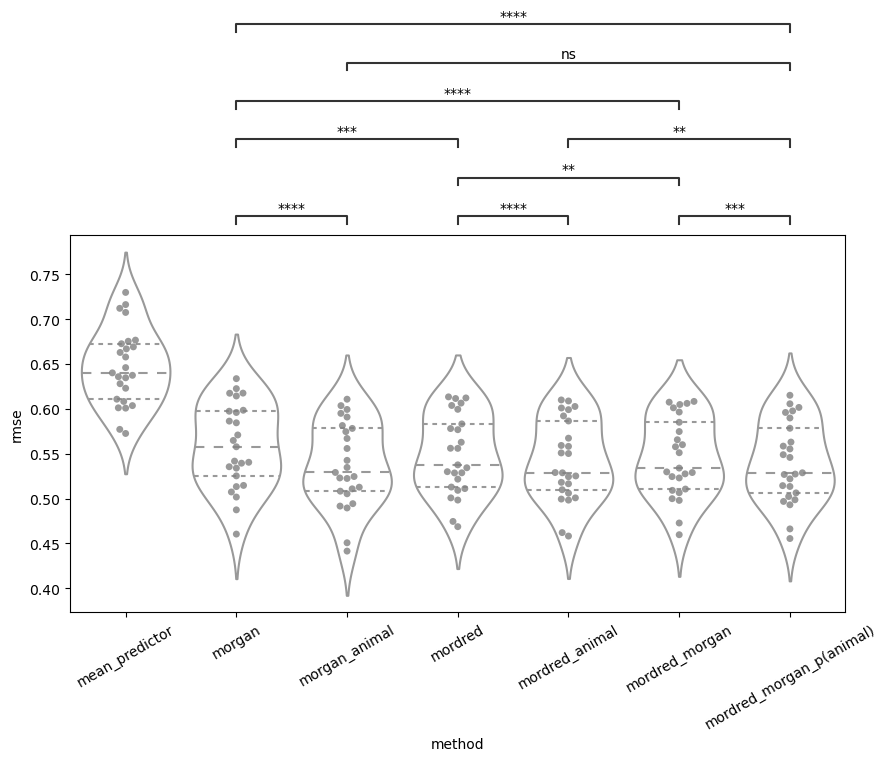

human_fup
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mordred vs. mordred_animal: t-test paired samples, P_val:1.169e-12 t=1.343e+01
morgan vs. morgan_animal: t-test paired samples, P_val:3.499e-20 t=2.896e+01
mordred_morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:1.828e-15 t=1.804e+01
mordred vs. mordred_morgan: t-test paired samples, P_val:7.979e-02 t=-1.829e+00
morgan vs. mordred: t-test paired samples, P_val:8.843e-18 t=2.282e+01
mordred_animal vs. mordred_morgan_p(animal): t-test paired samples, P_val:4.267e-02 t=-2.141e+00
morgan vs. mordred_morgan: t-test paired samples, P_val:3.555e-18 t=2.374e+01
morgan_animal vs. mordred_morgan_p(animal): t-test paired samples, P_val:1.640e-01 t=1.436e+00
morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:1.807e-20 t=2.979e+01


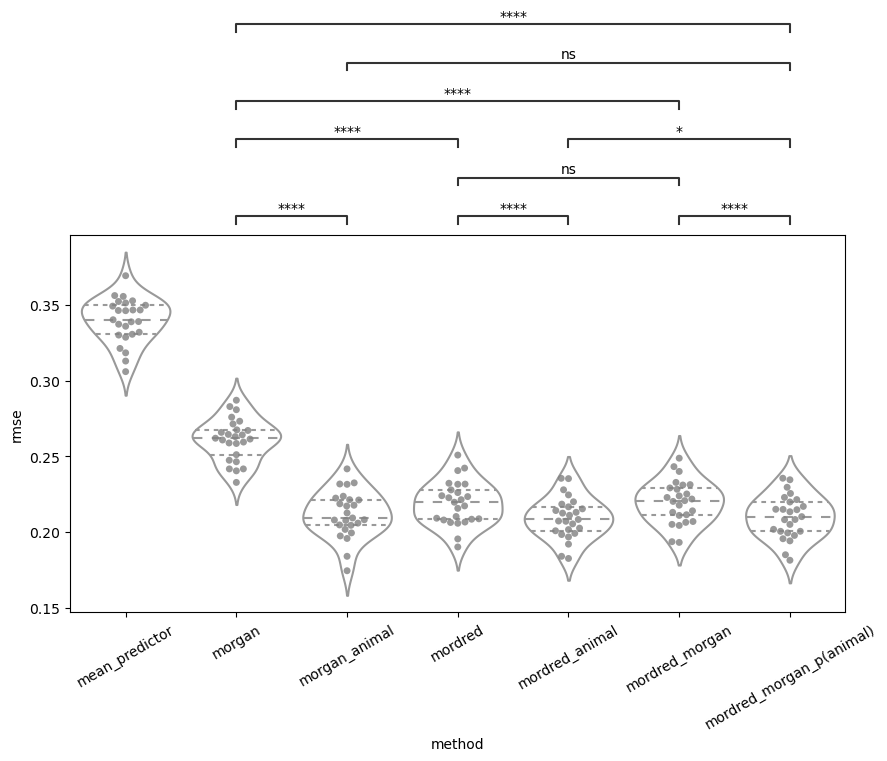

human_mrt
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mordred vs. mordred_animal: t-test paired samples, P_val:4.279e-03 t=3.155e+00
morgan vs. morgan_animal: t-test paired samples, P_val:9.364e-09 t=8.559e+00
mordred_morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:2.081e-02 t=2.474e+00
mordred vs. mordred_morgan: t-test paired samples, P_val:5.418e-02 t=2.025e+00
morgan vs. mordred: t-test paired samples, P_val:8.453e-04 t=3.812e+00
mordred_animal vs. mordred_morgan_p(animal): t-test paired samples, P_val:3.970e-01 t=8.624e-01
morgan vs. mordred_morgan: t-test paired samples, P_val:1.688e-04 t=4.449e+00
morgan_animal vs. mordred_morgan_p(animal): t-test paired samples, P_val:2.119e-01 t=-1.283e+00
morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:5.677e-06 t=5.793e+00


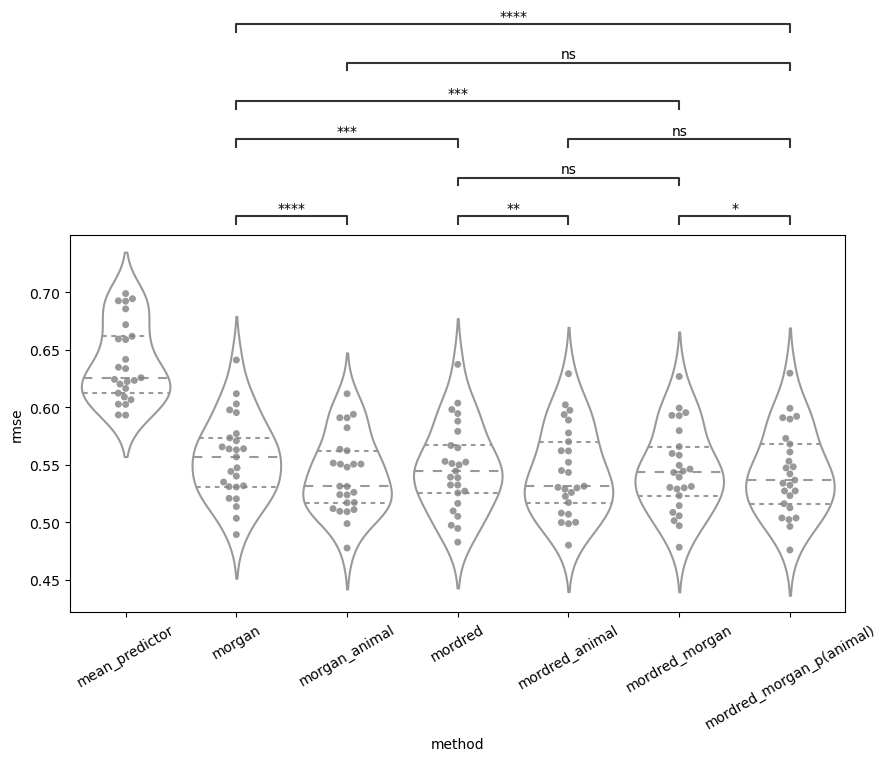

human_thalf
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mordred vs. mordred_animal: t-test paired samples, P_val:9.256e-05 t=4.685e+00
morgan vs. morgan_animal: t-test paired samples, P_val:1.942e-12 t=1.312e+01
mordred_morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:6.146e-06 t=5.761e+00
mordred vs. mordred_morgan: t-test paired samples, P_val:3.602e-01 t=9.329e-01
morgan vs. mordred: t-test paired samples, P_val:2.817e-07 t=7.038e+00
mordred_animal vs. mordred_morgan_p(animal): t-test paired samples, P_val:3.862e-01 t=8.827e-01
morgan vs. mordred_morgan: t-test paired samples, P_val:9.275e-09 t=8.563e+00
morgan_animal vs. mordred_morgan_p(animal): t-test paired samples, P_val:2.314e-01 t=-1.228e+00
morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:3.035e-11 t=1.149e+01


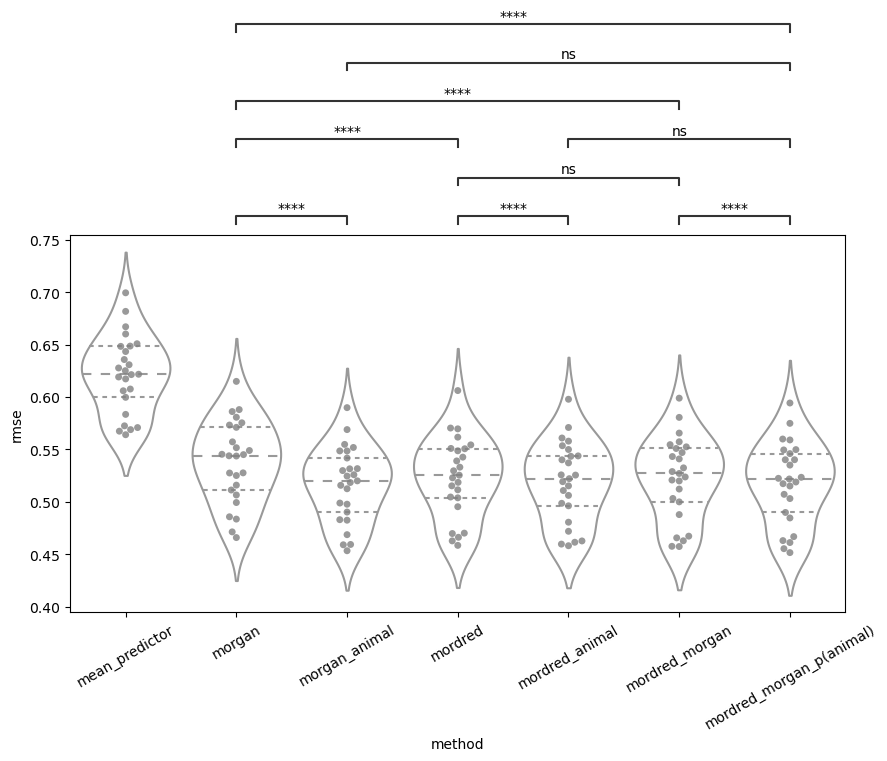

r2
human_VDss_L_kg
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mordred vs. mordred_animal: t-test paired samples, P_val:5.422e-08 t=-7.757e+00
morgan vs. morgan_animal: t-test paired samples, P_val:5.435e-12 t=-1.249e+01


/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 48.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


mordred_morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:8.840e-07 t=-6.555e+00
mordred vs. mordred_morgan: t-test paired samples, P_val:4.301e-02 t=-2.137e+00
morgan vs. mordred: t-test paired samples, P_val:1.274e-11 t=-1.199e+01
mordred_animal vs. mordred_morgan_p(animal): t-test paired samples, P_val:4.160e-01 t=-8.276e-01
morgan vs. mordred_morgan: t-test paired samples, P_val:6.955e-13 t=-1.376e+01
morgan_animal vs. mordred_morgan_p(animal): t-test paired samples, P_val:3.684e-01 t=-9.167e-01
morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:1.001e-13 t=-1.506e+01


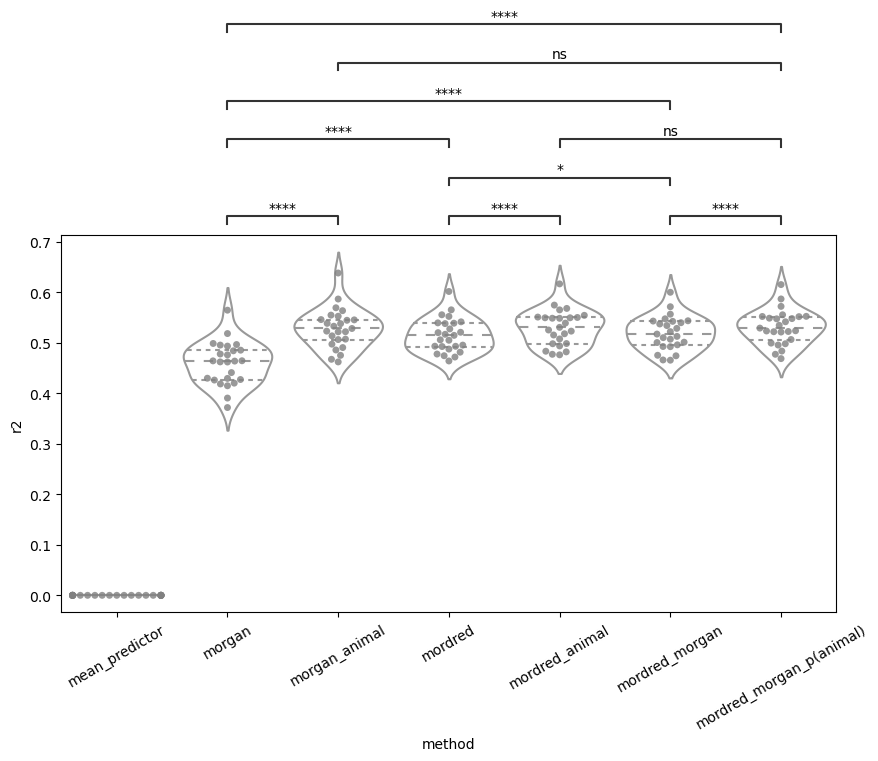

human_CL_mL_min_kg
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mordred vs. mordred_animal: t-test paired samples, P_val:1.272e-05 t=-5.470e+00
morgan vs. morgan_animal: t-test paired samples, P_val:8.280e-09 t=-8.616e+00
mordred_morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:2.048e-04 t=-4.373e+00


/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 48.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


mordred vs. mordred_morgan: t-test paired samples, P_val:5.099e-03 t=-3.082e+00
morgan vs. mordred: t-test paired samples, P_val:6.513e-04 t=-3.916e+00
mordred_animal vs. mordred_morgan_p(animal): t-test paired samples, P_val:9.674e-03 t=-2.811e+00
morgan vs. mordred_morgan: t-test paired samples, P_val:2.742e-05 t=-5.164e+00
morgan_animal vs. mordred_morgan_p(animal): t-test paired samples, P_val:7.877e-02 t=1.836e+00
morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:2.670e-06 t=-6.099e+00


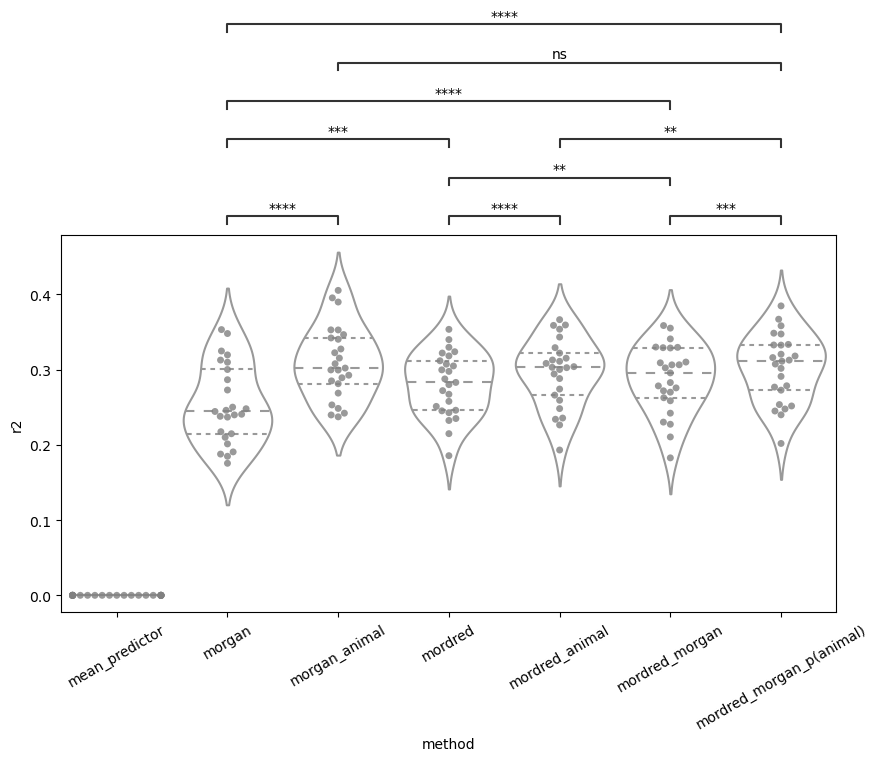

human_fup
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mordred vs. mordred_animal: t-test paired samples, P_val:1.623e-11 t=-1.185e+01
morgan vs. morgan_animal: t-test paired samples, P_val:4.000e-20 t=-2.880e+01
mordred_morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:1.709e-14 t=-1.632e+01


/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 48.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


mordred vs. mordred_morgan: t-test paired samples, P_val:1.005e-01 t=1.708e+00
morgan vs. mordred: t-test paired samples, P_val:1.731e-19 t=-2.704e+01
mordred_animal vs. mordred_morgan_p(animal): t-test paired samples, P_val:3.847e-02 t=2.190e+00
morgan vs. mordred_morgan: t-test paired samples, P_val:9.087e-20 t=-2.780e+01
morgan_animal vs. mordred_morgan_p(animal): t-test paired samples, P_val:2.178e-01 t=-1.266e+00
morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:5.452e-22 t=-3.459e+01


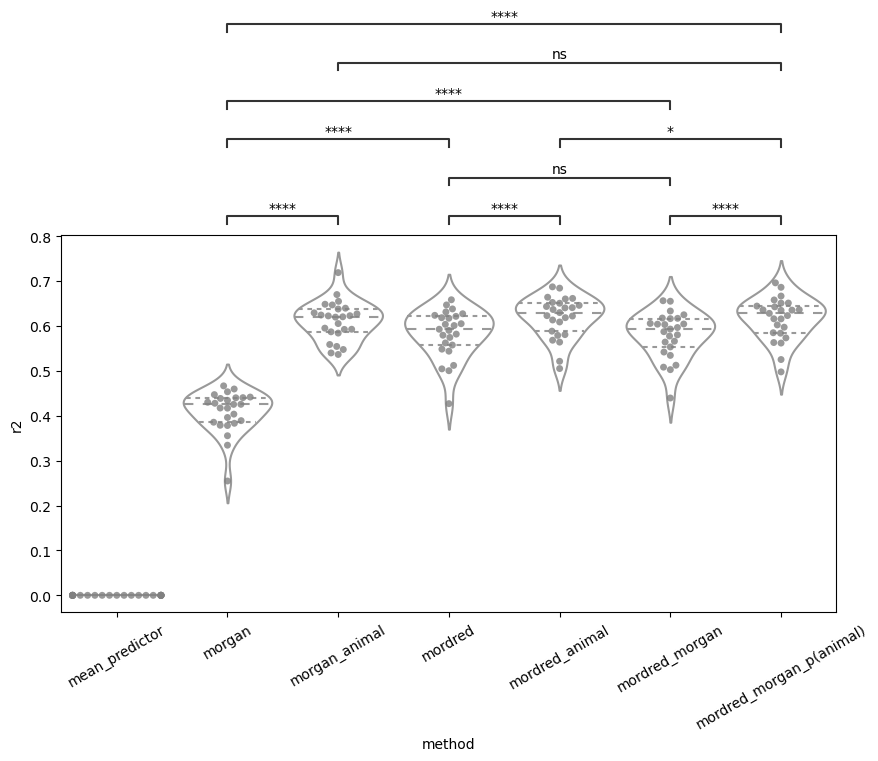

human_mrt
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mordred vs. mordred_animal: t-test paired samples, P_val:4.469e-03 t=-3.137e+00
morgan vs. morgan_animal: t-test paired samples, P_val:1.137e-08 t=-8.468e+00
mordred_morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:2.080e-02 t=-2.474e+00


/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 48.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


mordred vs. mordred_morgan: t-test paired samples, P_val:5.480e-02 t=-2.019e+00
morgan vs. mordred: t-test paired samples, P_val:7.313e-04 t=-3.870e+00
mordred_animal vs. mordred_morgan_p(animal): t-test paired samples, P_val:4.427e-01 t=-7.806e-01
morgan vs. mordred_morgan: t-test paired samples, P_val:1.758e-04 t=-4.433e+00
morgan_animal vs. mordred_morgan_p(animal): t-test paired samples, P_val:2.529e-01 t=1.171e+00
morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:5.810e-06 t=-5.784e+00


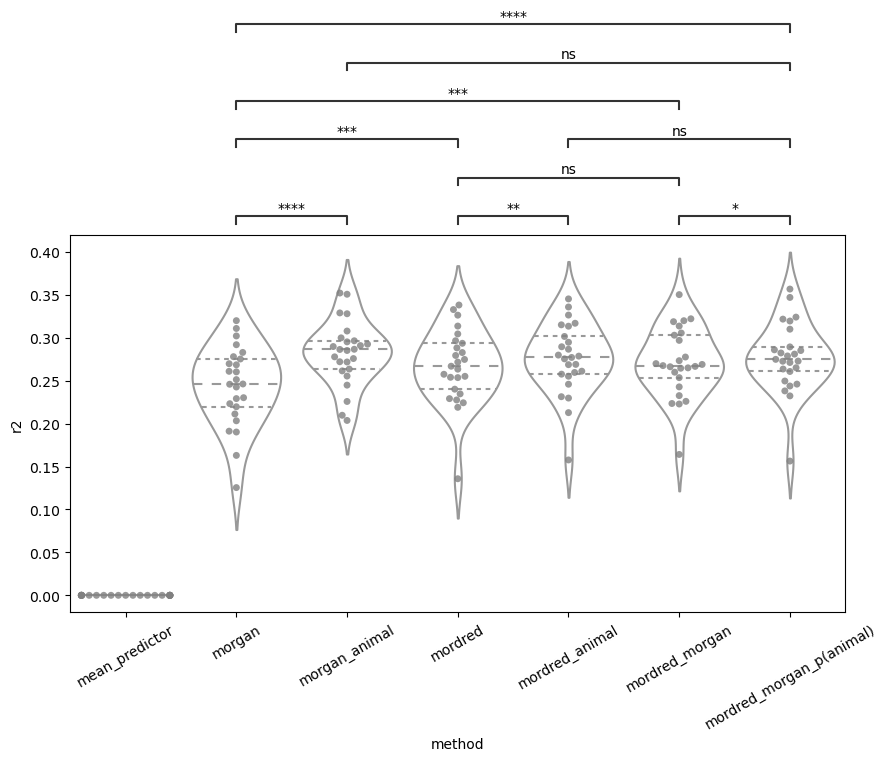

human_thalf
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mordred vs. mordred_animal: t-test paired samples, P_val:1.009e-04 t=-4.651e+00
morgan vs. morgan_animal: t-test paired samples, P_val:4.441e-12 t=-1.261e+01
mordred_morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:6.663e-06 t=-5.729e+00


/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 48.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


mordred vs. mordred_morgan: t-test paired samples, P_val:3.393e-01 t=-9.749e-01
morgan vs. mordred: t-test paired samples, P_val:3.886e-07 t=-6.901e+00
mordred_animal vs. mordred_morgan_p(animal): t-test paired samples, P_val:3.447e-01 t=-9.639e-01
morgan vs. mordred_morgan: t-test paired samples, P_val:1.934e-08 t=-8.223e+00
morgan_animal vs. mordred_morgan_p(animal): t-test paired samples, P_val:2.837e-01 t=1.097e+00
morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:1.113e-10 t=-1.078e+01


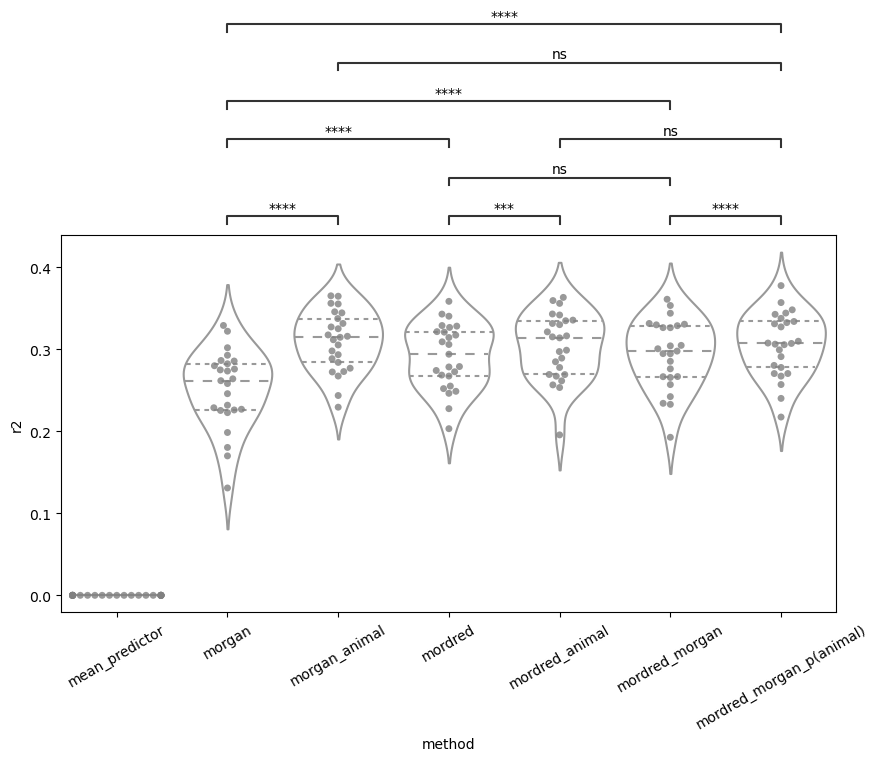

In [7]:
for metric in ["rmse", "r2"]:

    print(metric)
    
    for endpoint in  ["human_VDss_L_kg","human_CL_mL_min_kg", "human_fup", "human_mrt", "human_thalf"]:

        print(endpoint)
        pairs= [ ("mordred_morgan", 'mordred'),
                 ("mordred_morgan", 'morgan'),
                ("morgan", 'mordred'),
                ("mordred_animal", 'mordred'),
                 ("morgan_animal", 'morgan'),
               ("mordred_morgan_p(animal)", "mordred_morgan"),
               ("mordred_morgan_p(animal)", "morgan"),
               ("mordred_animal", "mordred_morgan_p(animal)"),
               ("morgan_animal", "mordred_morgan_p(animal)"),]

        my_order= ["mean_predictor", "morgan","morgan_animal",
                   "mordred", "mordred_animal", 
                   "mordred_morgan", "mordred_morgan_p(animal)"]


        fig, ax = plt.subplots(figsize=(10, 5), dpi=100)

        g = sns.violinplot(ax=ax,x='method', y=metric, data=df[df["endpoint"]==endpoint], scale='width', inner='quartile', order=my_order, color="white")
        g = sns.swarmplot(ax=ax,x='method', y=metric, data=df[df["endpoint"]==endpoint], order=my_order,color="grey", alpha=0.8)
        g.set_xticklabels(g.get_xticklabels(), rotation=30)        
        
        annotator = Annotator(ax=ax, pairs = pairs, data=df[df["endpoint"]==endpoint], x="method", y=metric, order=my_order)
        annotator.configure(test='t-test_paired', text_format='star', loc='outside')
        annotator.apply_and_annotate()

        plt.show()


fold_2
human_VDss_L_kg
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mordred_morgan_p(animal)_real(animal) vs. mordred_morgan_p(animal): t-test paired samples, P_val:5.932e-01 t=-5.414e-01
p(animal)_real(animal)_only vs. mordred_morgan_p(animal): t-test paired samples, P_val:1.090e-08 t=-8.488e+00
mordred_morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:2.650e-03 t=-3.352e+00


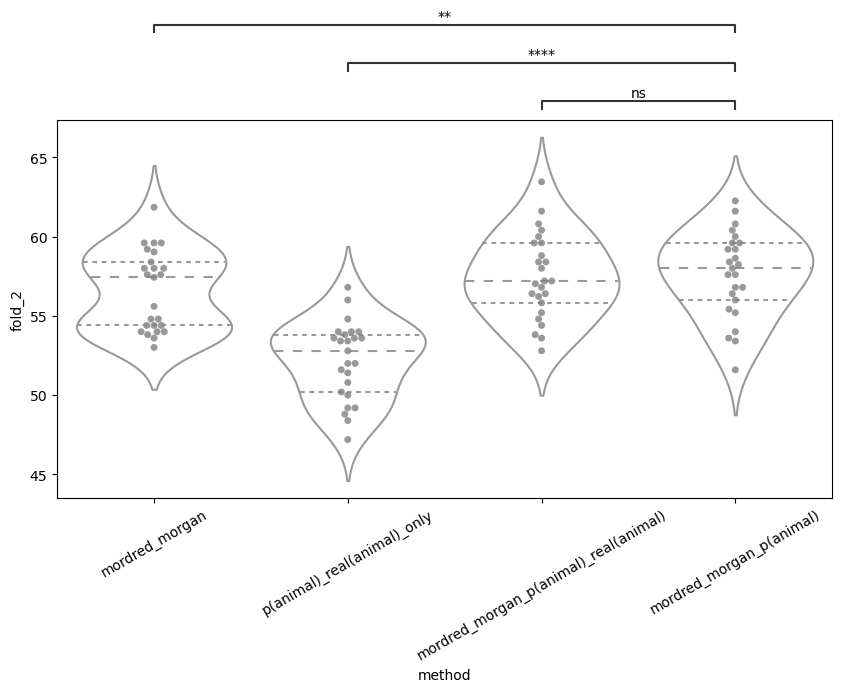

human_CL_mL_min_kg
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mordred_morgan_p(animal)_real(animal) vs. mordred_morgan_p(animal): t-test paired samples, P_val:6.789e-01 t=4.191e-01
p(animal)_real(animal)_only vs. mordred_morgan_p(animal): t-test paired samples, P_val:1.901e-05 t=-5.310e+00
mordred_morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:2.876e-02 t=-2.326e+00


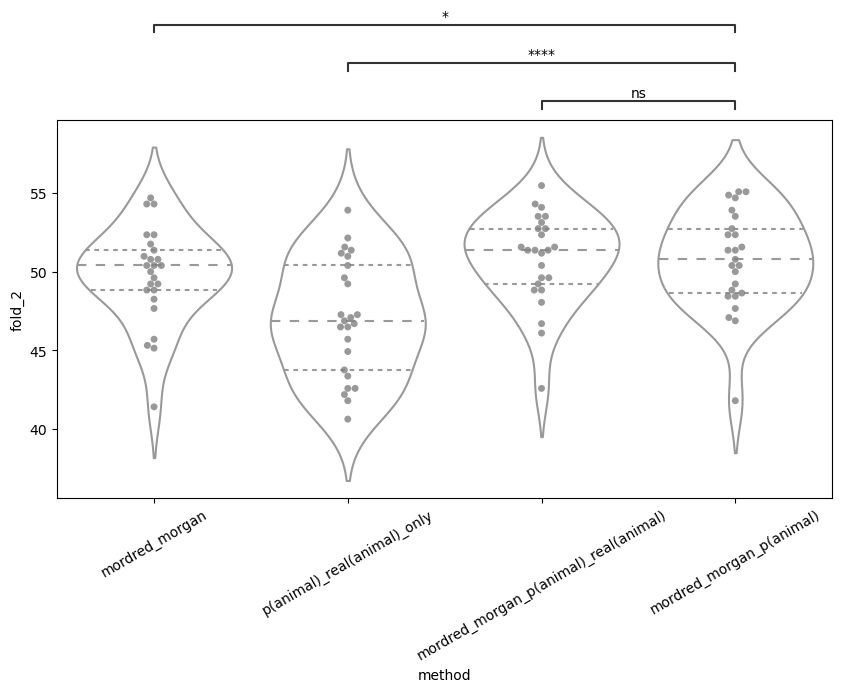

human_fup
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mordred_morgan_p(animal)_real(animal) vs. mordred_morgan_p(animal): t-test paired samples, P_val:7.398e-01 t=-3.360e-01
p(animal)_real(animal)_only vs. mordred_morgan_p(animal): t-test paired samples, P_val:1.931e-01 t=-1.339e+00
mordred_morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:3.518e-02 t=-2.232e+00


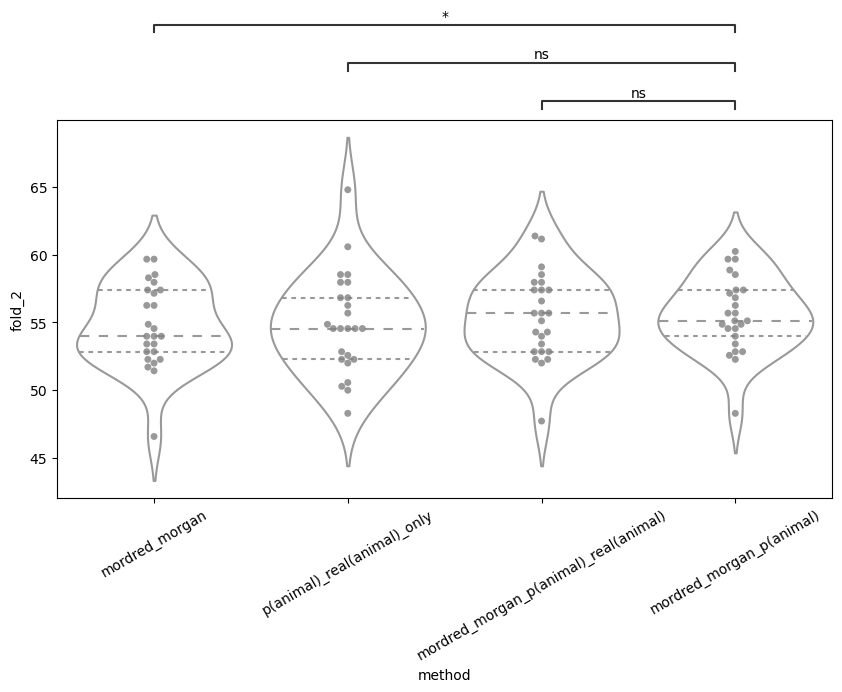

human_mrt
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mordred_morgan_p(animal)_real(animal) vs. mordred_morgan_p(animal): t-test paired samples, P_val:4.105e-01 t=-8.376e-01
p(animal)_real(animal)_only vs. mordred_morgan_p(animal): t-test paired samples, P_val:1.334e-06 t=-6.385e+00
mordred_morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:2.570e-02 t=-2.378e+00


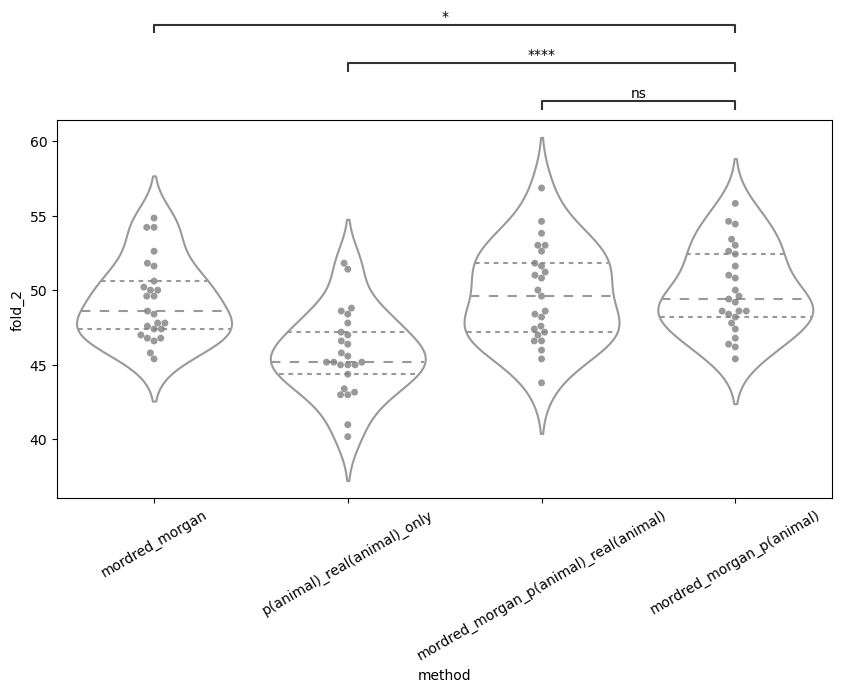

human_thalf
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mordred_morgan_p(animal)_real(animal) vs. mordred_morgan_p(animal): t-test paired samples, P_val:2.760e-02 t=-2.345e+00
p(animal)_real(animal)_only vs. mordred_morgan_p(animal): t-test paired samples, P_val:5.506e-11 t=-1.116e+01
mordred_morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:1.018e-02 t=-2.789e+00


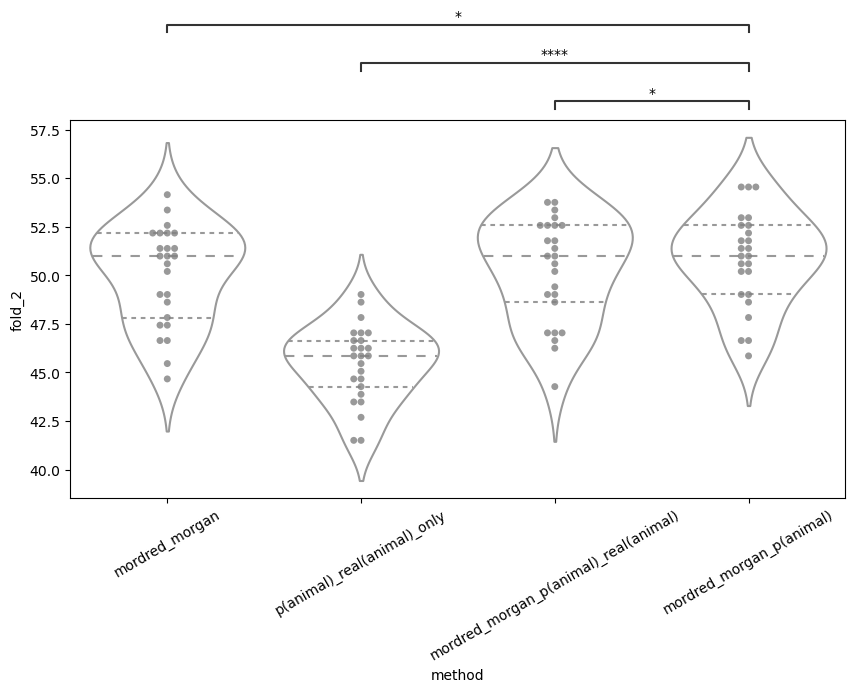

fold_3
human_VDss_L_kg
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mordred_morgan_p(animal)_real(animal) vs. mordred_morgan_p(animal): t-test paired samples, P_val:2.228e-01 t=-1.251e+00
p(animal)_real(animal)_only vs. mordred_morgan_p(animal): t-test paired samples, P_val:5.725e-10 t=-9.922e+00
mordred_morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:5.792e-03 t=-3.029e+00


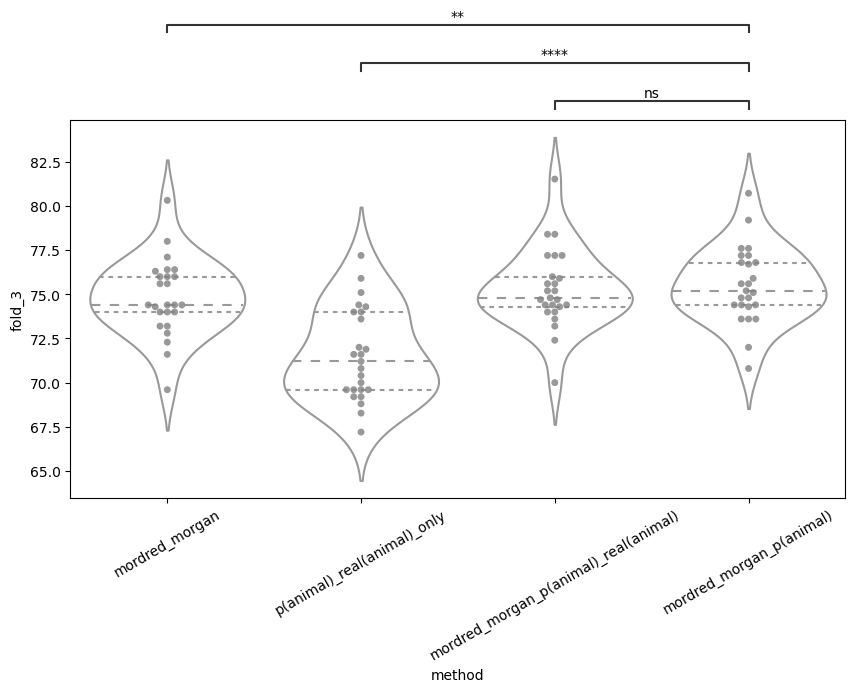

human_CL_mL_min_kg
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mordred_morgan_p(animal)_real(animal) vs. mordred_morgan_p(animal): t-test paired samples, P_val:8.760e-01 t=1.577e-01
p(animal)_real(animal)_only vs. mordred_morgan_p(animal): t-test paired samples, P_val:2.986e-04 t=-4.224e+00
mordred_morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:5.767e-01 t=-5.659e-01


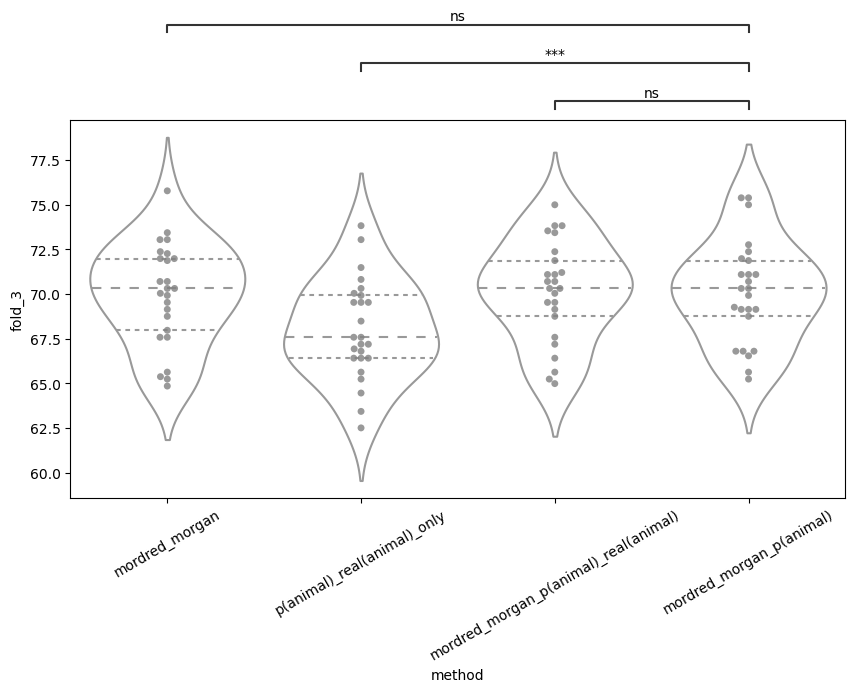

human_fup
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mordred_morgan_p(animal)_real(animal) vs. mordred_morgan_p(animal): t-test paired samples, P_val:8.102e-01 t=2.429e-01
p(animal)_real(animal)_only vs. mordred_morgan_p(animal): t-test paired samples, P_val:3.631e-01 t=9.272e-01
mordred_morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:6.853e-05 t=-4.803e+00


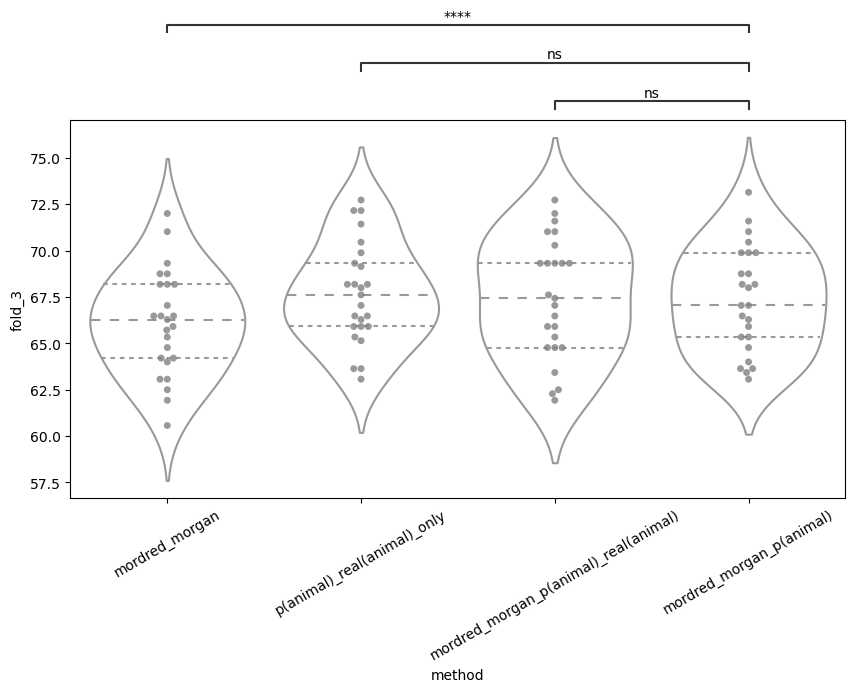

human_mrt
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mordred_morgan_p(animal)_real(animal) vs. mordred_morgan_p(animal): t-test paired samples, P_val:4.239e-01 t=8.135e-01
p(animal)_real(animal)_only vs. mordred_morgan_p(animal): t-test paired samples, P_val:1.778e-11 t=-1.180e+01
mordred_morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:5.858e-01 t=5.523e-01


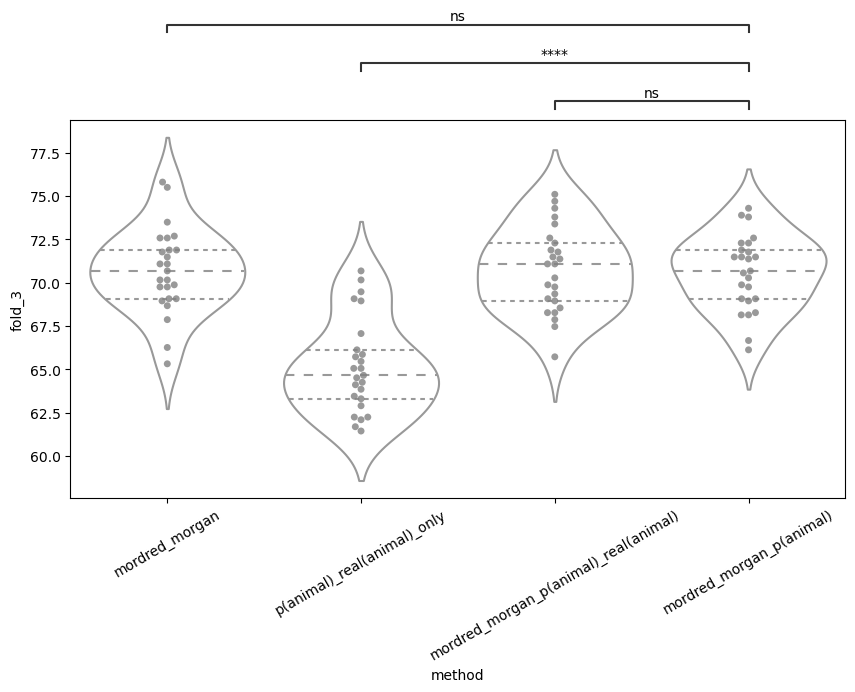

human_thalf
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mordred_morgan_p(animal)_real(animal) vs. mordred_morgan_p(animal): t-test paired samples, P_val:5.667e-02 t=-2.002e+00
p(animal)_real(animal)_only vs. mordred_morgan_p(animal): t-test paired samples, P_val:4.518e-12 t=-1.260e+01
mordred_morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:1.139e-03 t=-3.694e+00


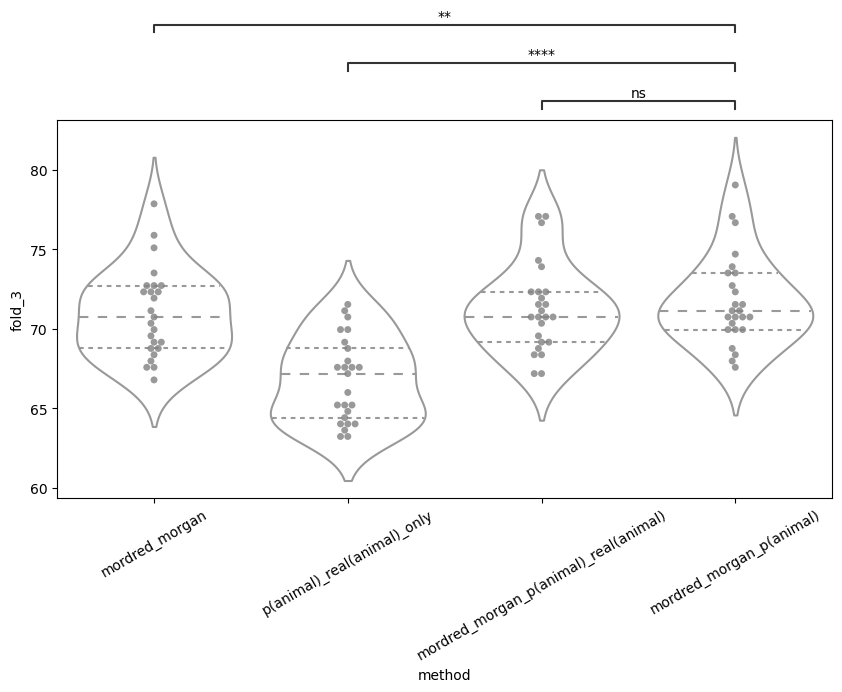

fold_5
human_VDss_L_kg
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mordred_morgan_p(animal)_real(animal) vs. mordred_morgan_p(animal): t-test paired samples, P_val:8.711e-01 t=-1.640e-01
p(animal)_real(animal)_only vs. mordred_morgan_p(animal): t-test paired samples, P_val:3.606e-13 t=-1.419e+01
mordred_morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:1.026e-01 t=-1.697e+00


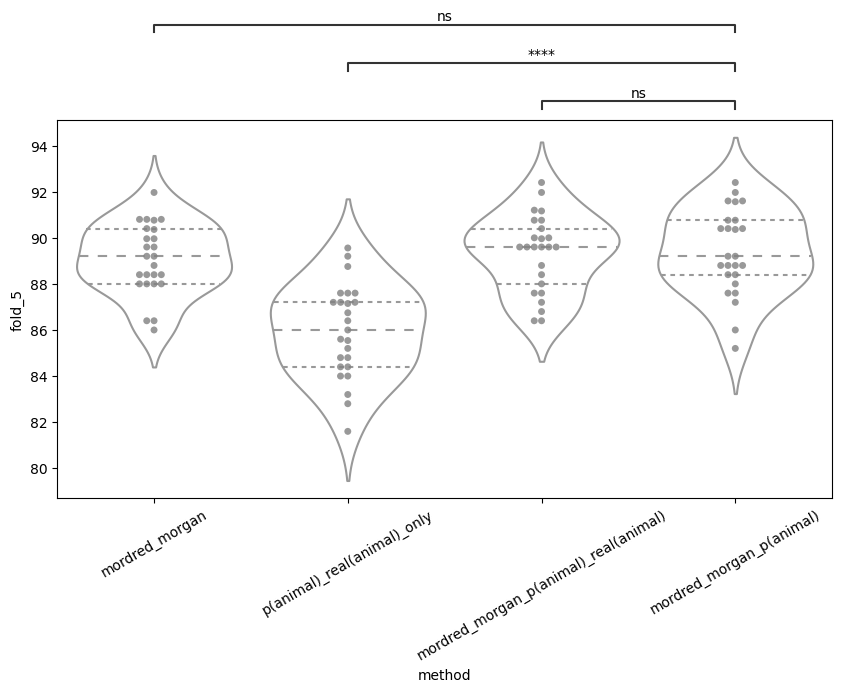

human_CL_mL_min_kg
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mordred_morgan_p(animal)_real(animal) vs. mordred_morgan_p(animal): t-test paired samples, P_val:9.408e-01 t=7.501e-02
p(animal)_real(animal)_only vs. mordred_morgan_p(animal): t-test paired samples, P_val:1.250e-06 t=-6.411e+00
mordred_morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:8.929e-01 t=-1.361e-01


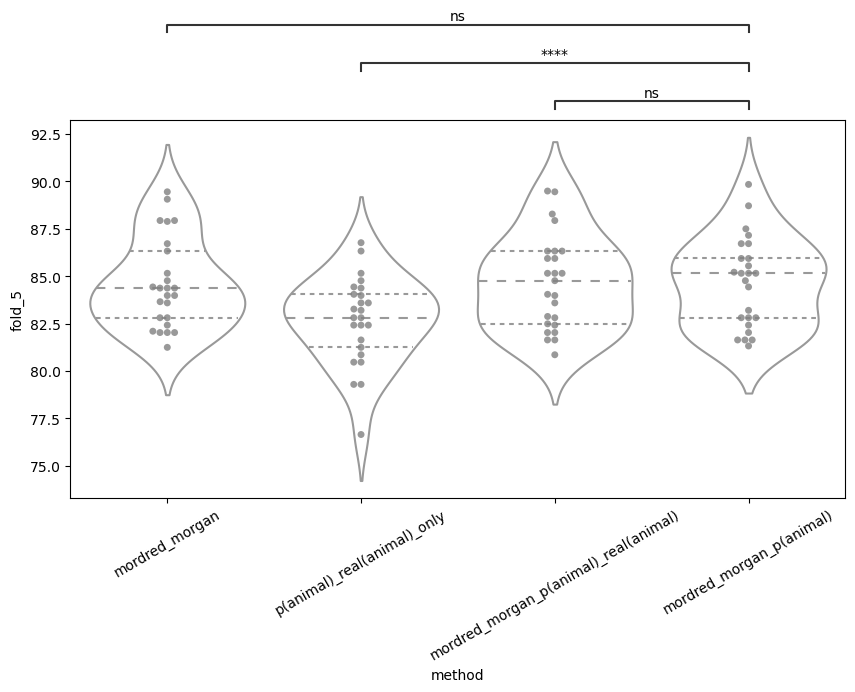

human_fup
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mordred_morgan_p(animal)_real(animal) vs. mordred_morgan_p(animal): t-test paired samples, P_val:4.090e-01 t=-8.404e-01
p(animal)_real(animal)_only vs. mordred_morgan_p(animal): t-test paired samples, P_val:8.210e-01 t=-2.288e-01
mordred_morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:5.827e-03 t=-3.026e+00


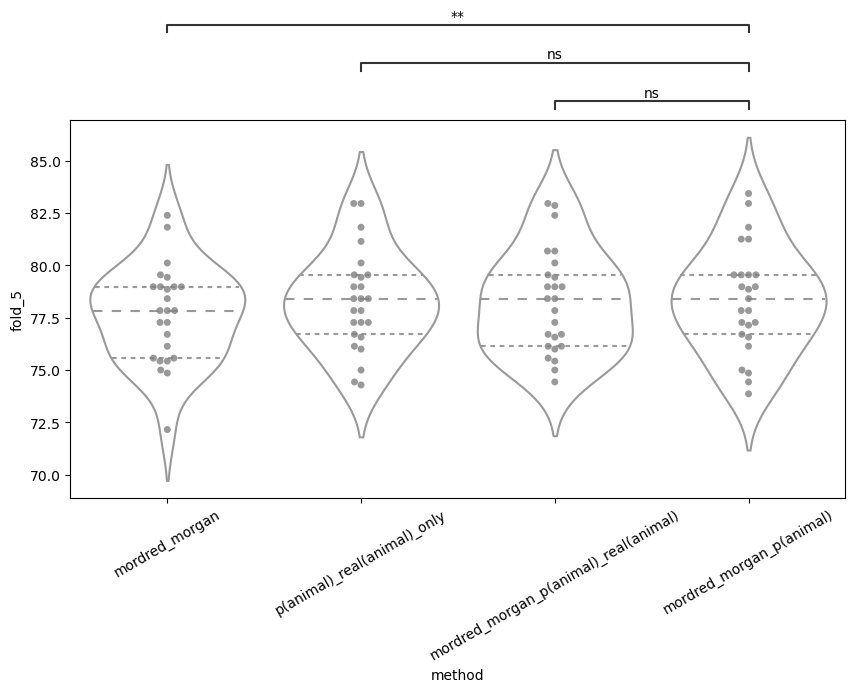

human_mrt
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mordred_morgan_p(animal)_real(animal) vs. mordred_morgan_p(animal): t-test paired samples, P_val:4.866e-01 t=-7.066e-01
p(animal)_real(animal)_only vs. mordred_morgan_p(animal): t-test paired samples, P_val:1.289e-07 t=-7.376e+00
mordred_morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:1.314e-01 t=-1.562e+00


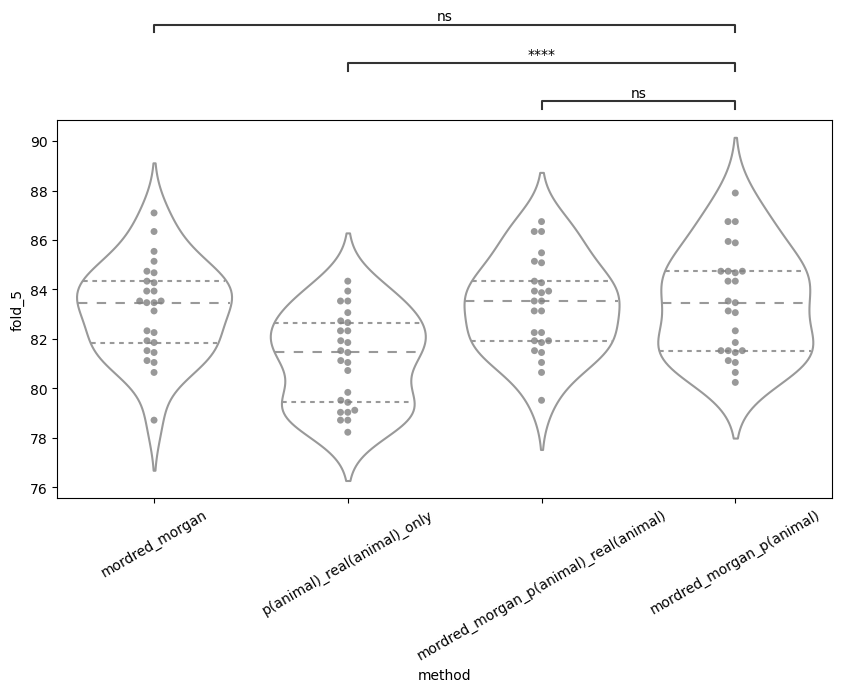

human_thalf
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mordred_morgan_p(animal)_real(animal) vs. mordred_morgan_p(animal): t-test paired samples, P_val:5.842e-01 t=-5.547e-01
p(animal)_real(animal)_only vs. mordred_morgan_p(animal): t-test paired samples, P_val:7.356e-07 t=-6.632e+00
mordred_morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:4.765e-02 t=-2.087e+00


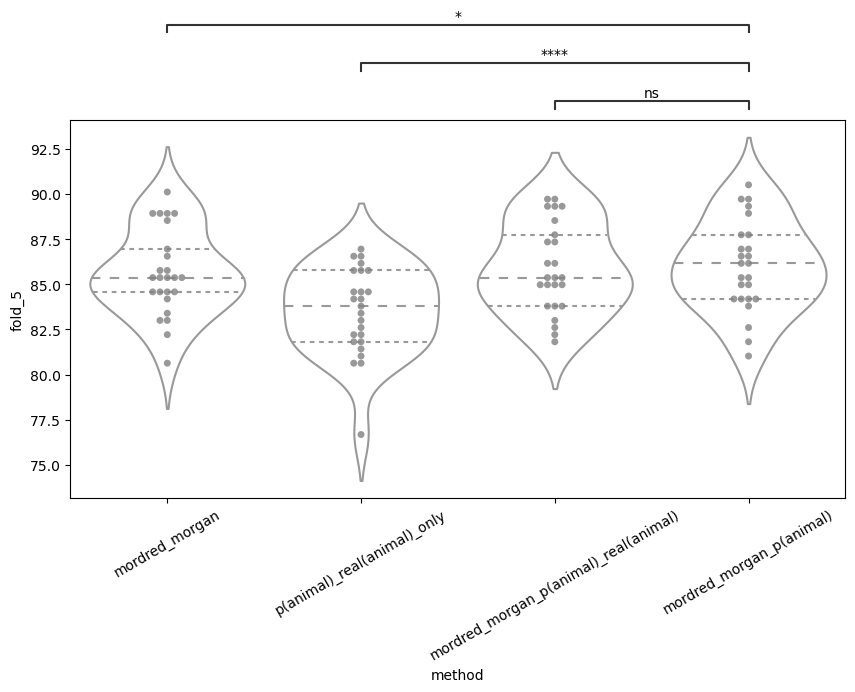

gmfe
human_VDss_L_kg
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mordred_morgan_p(animal)_real(animal) vs. mordred_morgan_p(animal): t-test paired samples, P_val:6.693e-01 t=-4.324e-01
p(animal)_real(animal)_only vs. mordred_morgan_p(animal): t-test paired samples, P_val:4.794e-17 t=2.119e+01
mordred_morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:2.014e-06 t=6.215e+00


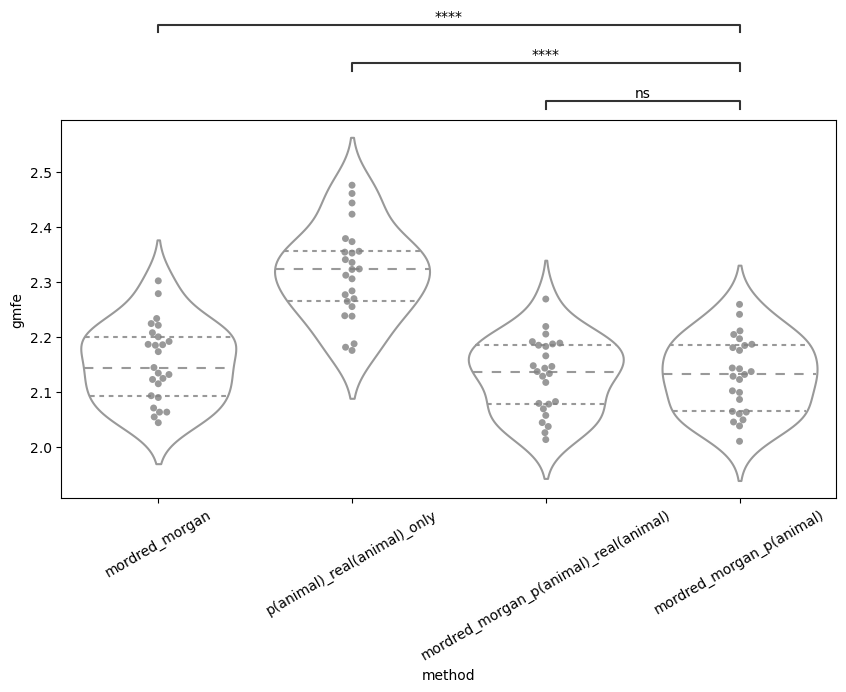

human_CL_mL_min_kg
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mordred_morgan_p(animal)_real(animal) vs. mordred_morgan_p(animal): t-test paired samples, P_val:5.682e-01 t=5.787e-01
p(animal)_real(animal)_only vs. mordred_morgan_p(animal): t-test paired samples, P_val:2.844e-12 t=1.288e+01
mordred_morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:1.534e-07 t=7.300e+00


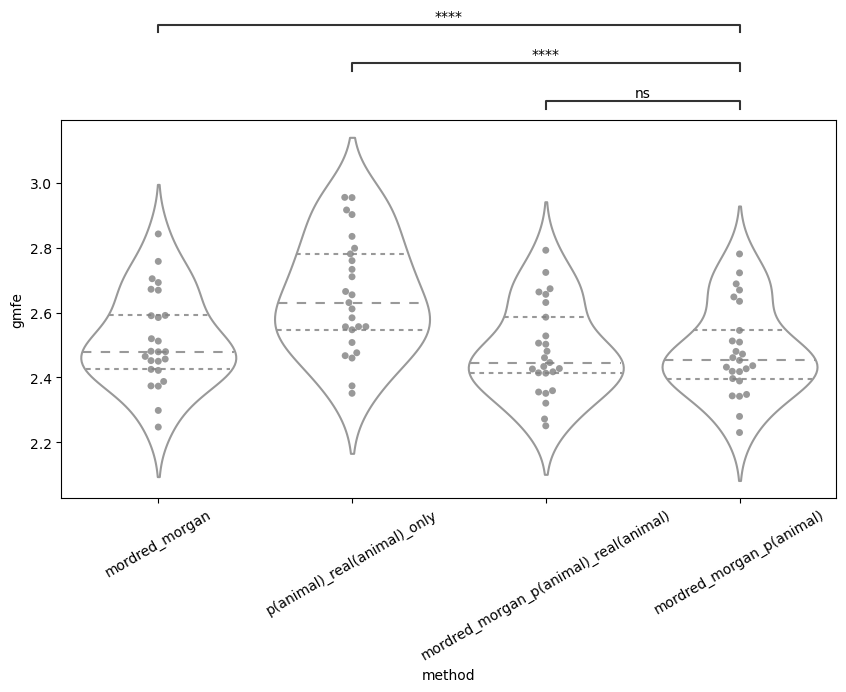

human_fup
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mordred_morgan_p(animal)_real(animal) vs. mordred_morgan_p(animal): t-test paired samples, P_val:1.473e-02 t=2.628e+00
p(animal)_real(animal)_only vs. mordred_morgan_p(animal): t-test paired samples, P_val:1.344e-01 t=1.549e+00
mordred_morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:2.130e-14 t=1.616e+01


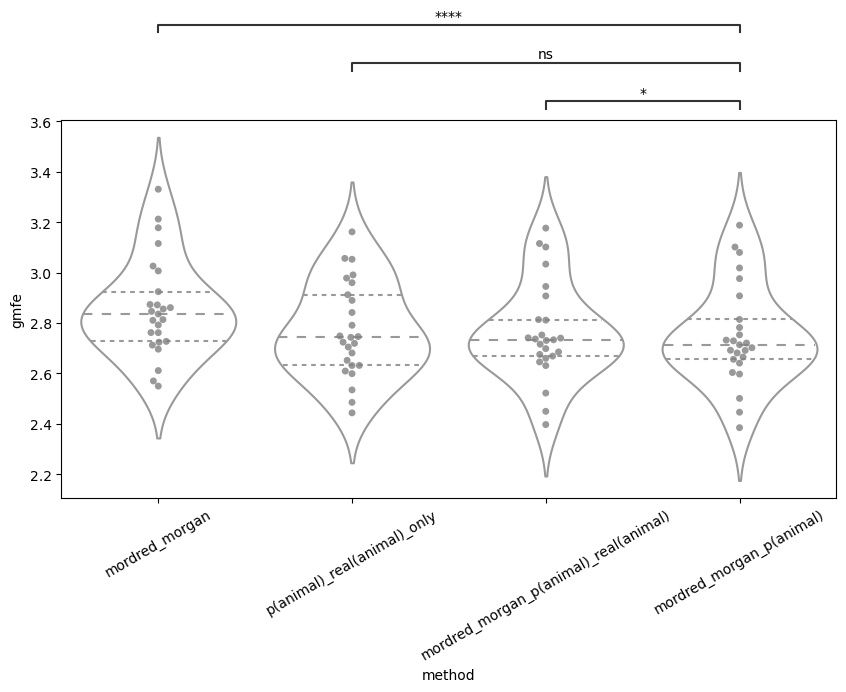

human_mrt
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mordred_morgan_p(animal)_real(animal) vs. mordred_morgan_p(animal): t-test paired samples, P_val:9.777e-02 t=1.723e+00
p(animal)_real(animal)_only vs. mordred_morgan_p(animal): t-test paired samples, P_val:1.342e-14 t=1.650e+01
mordred_morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:1.756e-03 t=3.519e+00


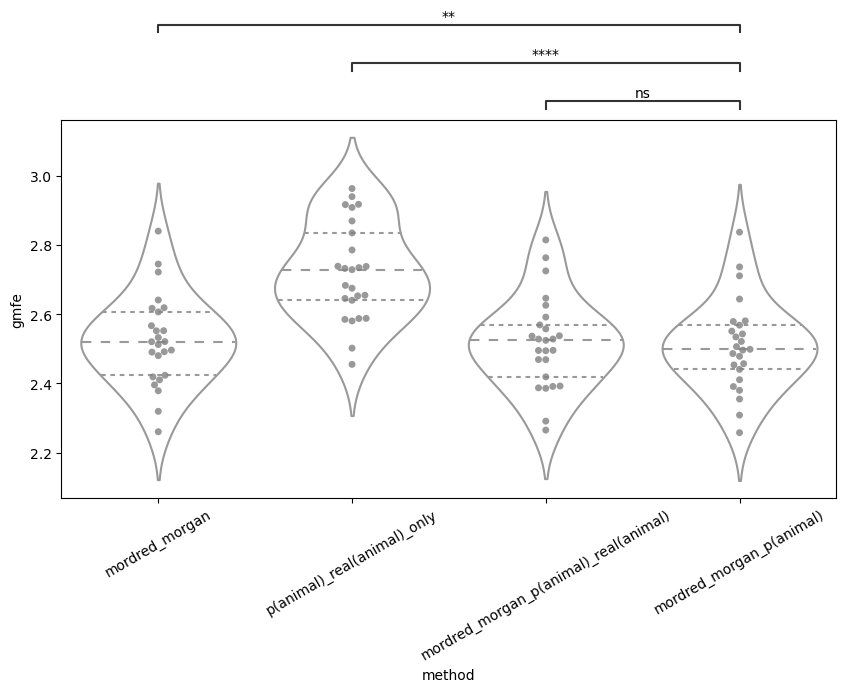

human_thalf
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mordred_morgan_p(animal)_real(animal) vs. mordred_morgan_p(animal): t-test paired samples, P_val:3.239e-01 t=1.007e+00
p(animal)_real(animal)_only vs. mordred_morgan_p(animal): t-test paired samples, P_val:1.515e-17 t=2.229e+01
mordred_morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:6.015e-04 t=3.948e+00


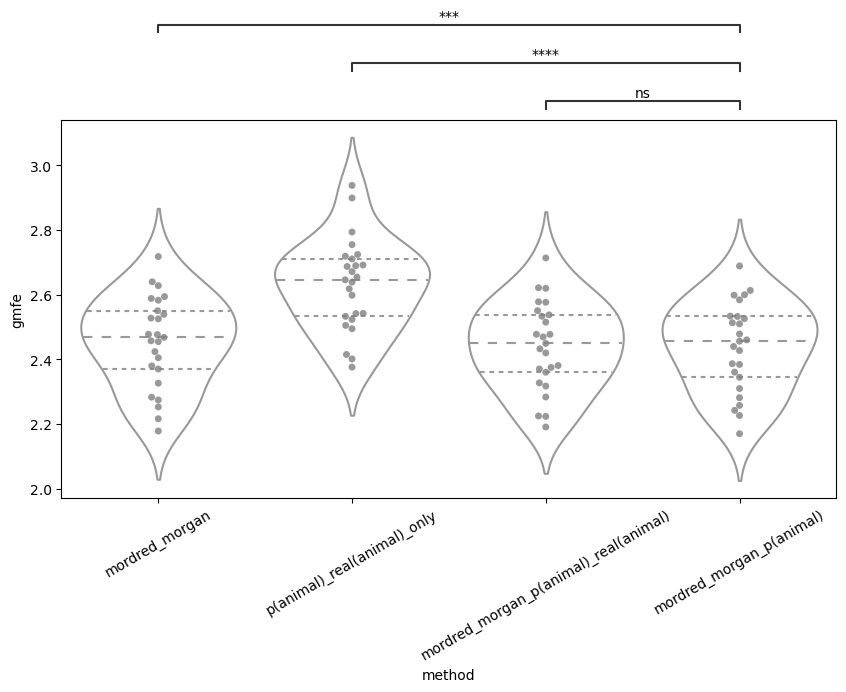

mfe
human_VDss_L_kg
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mordred_morgan_p(animal)_real(animal) vs. mordred_morgan_p(animal): t-test paired samples, P_val:8.191e-01 t=2.312e-01
p(animal)_real(animal)_only vs. mordred_morgan_p(animal): t-test paired samples, P_val:5.911e-08 t=7.719e+00
mordred_morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:9.392e-01 t=-7.708e-02


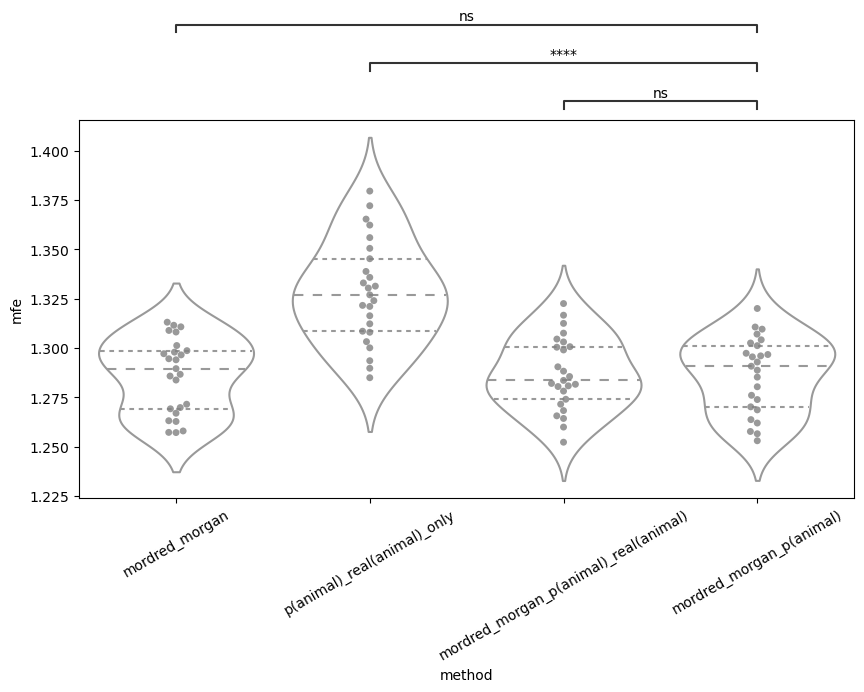

human_CL_mL_min_kg
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mordred_morgan_p(animal)_real(animal) vs. mordred_morgan_p(animal): t-test paired samples, P_val:1.829e-01 t=-1.372e+00
p(animal)_real(animal)_only vs. mordred_morgan_p(animal): t-test paired samples, P_val:5.352e-05 t=4.900e+00
mordred_morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:1.450e-01 t=1.506e+00


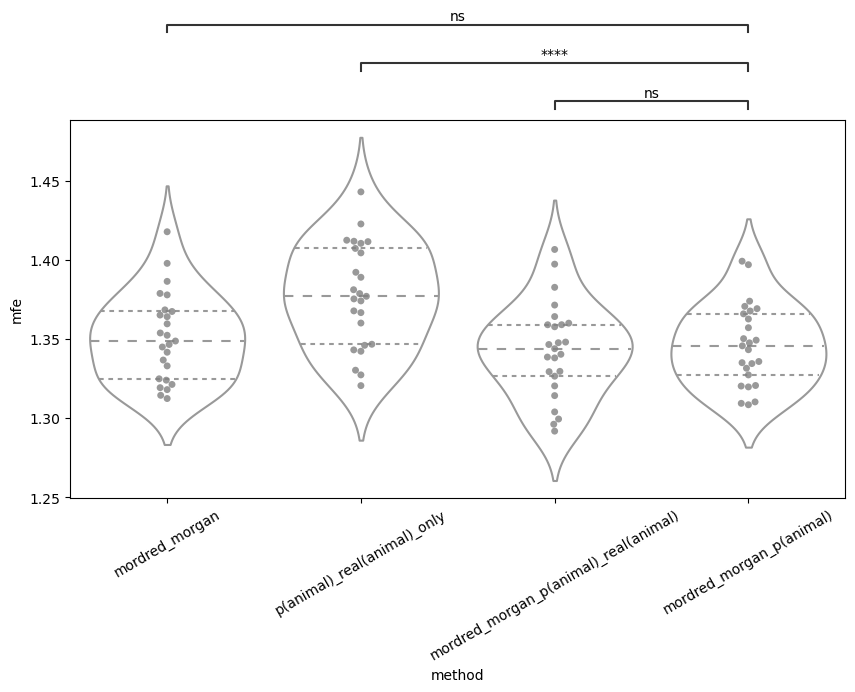

human_fup
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mordred_morgan_p(animal)_real(animal) vs. mordred_morgan_p(animal): t-test paired samples, P_val:7.055e-02 t=1.892e+00
p(animal)_real(animal)_only vs. mordred_morgan_p(animal): t-test paired samples, P_val:2.233e-02 t=2.442e+00
mordred_morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:2.732e-03 t=3.340e+00


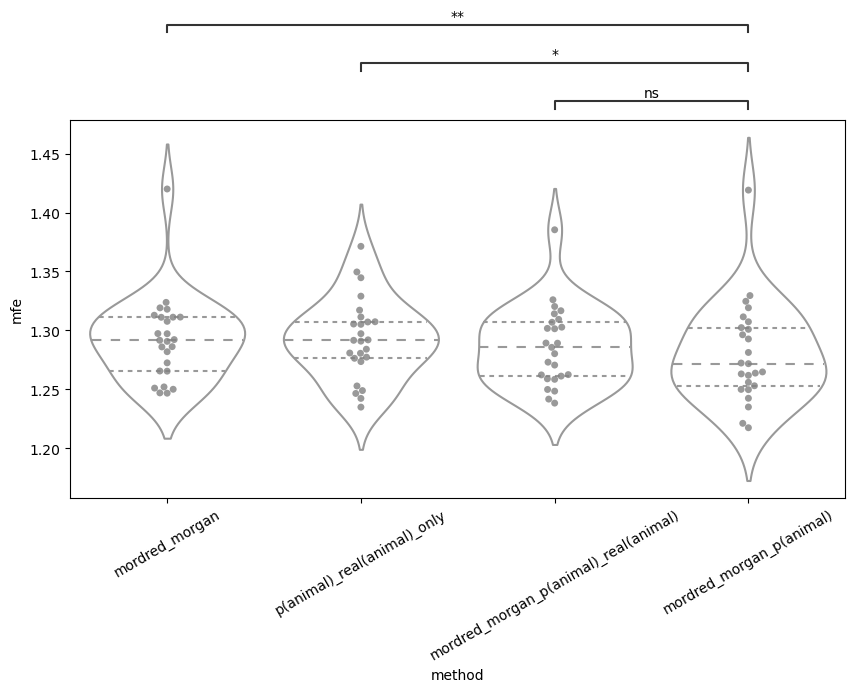

human_mrt
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mordred_morgan_p(animal)_real(animal) vs. mordred_morgan_p(animal): t-test paired samples, P_val:5.593e-01 t=5.922e-01
p(animal)_real(animal)_only vs. mordred_morgan_p(animal): t-test paired samples, P_val:1.790e-06 t=6.263e+00
mordred_morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:5.405e-03 t=3.058e+00


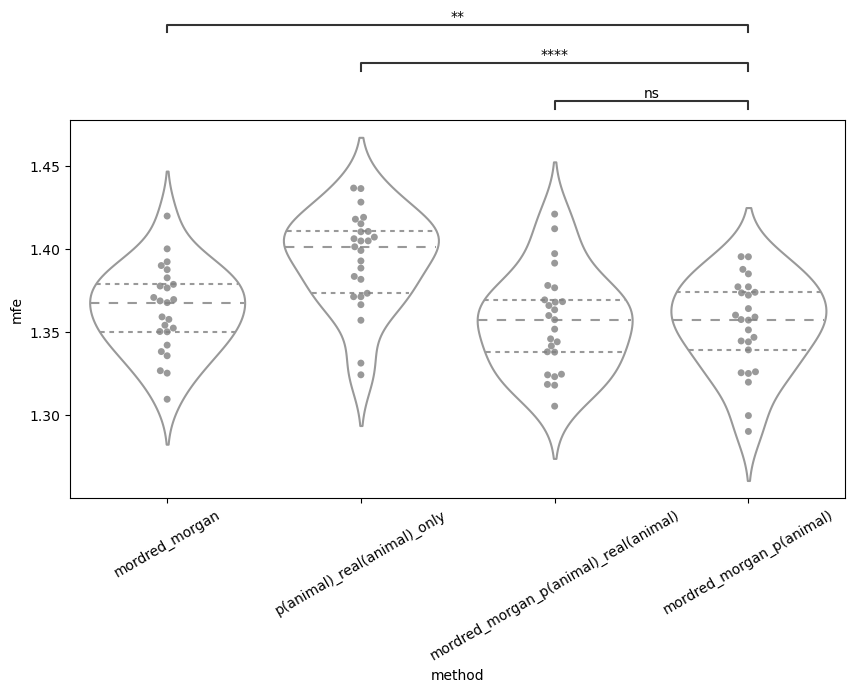

human_thalf
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mordred_morgan_p(animal)_real(animal) vs. mordred_morgan_p(animal): t-test paired samples, P_val:1.427e-01 t=1.516e+00
p(animal)_real(animal)_only vs. mordred_morgan_p(animal): t-test paired samples, P_val:4.459e-14 t=1.562e+01
mordred_morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:1.319e-02 t=2.677e+00


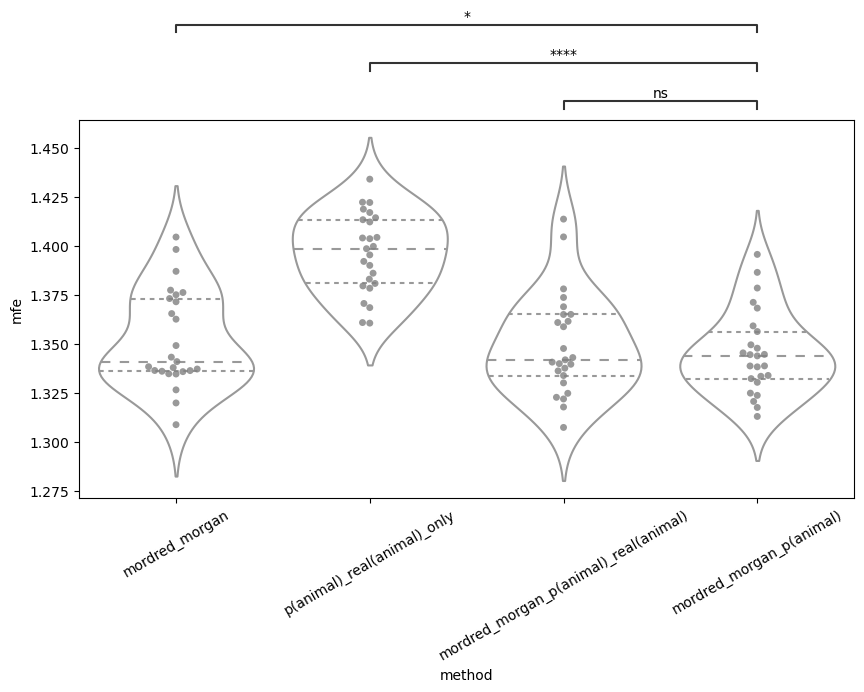

bias
human_VDss_L_kg
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mordred_morgan_p(animal)_real(animal) vs. mordred_morgan_p(animal): t-test paired samples, P_val:5.705e-01 t=-5.752e-01
p(animal)_real(animal)_only vs. mordred_morgan_p(animal): t-test paired samples, P_val:9.119e-03 t=-2.837e+00
mordred_morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:7.060e-01 t=3.818e-01


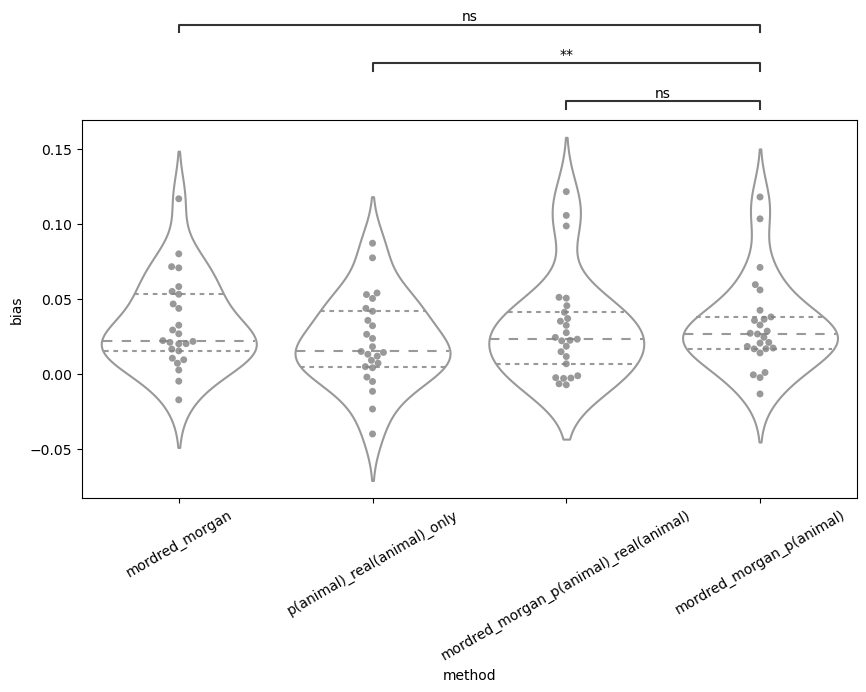

human_CL_mL_min_kg
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mordred_morgan_p(animal)_real(animal) vs. mordred_morgan_p(animal): t-test paired samples, P_val:4.694e-01 t=7.351e-01
p(animal)_real(animal)_only vs. mordred_morgan_p(animal): t-test paired samples, P_val:2.628e-01 t=1.147e+00
mordred_morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:3.526e-01 t=9.479e-01


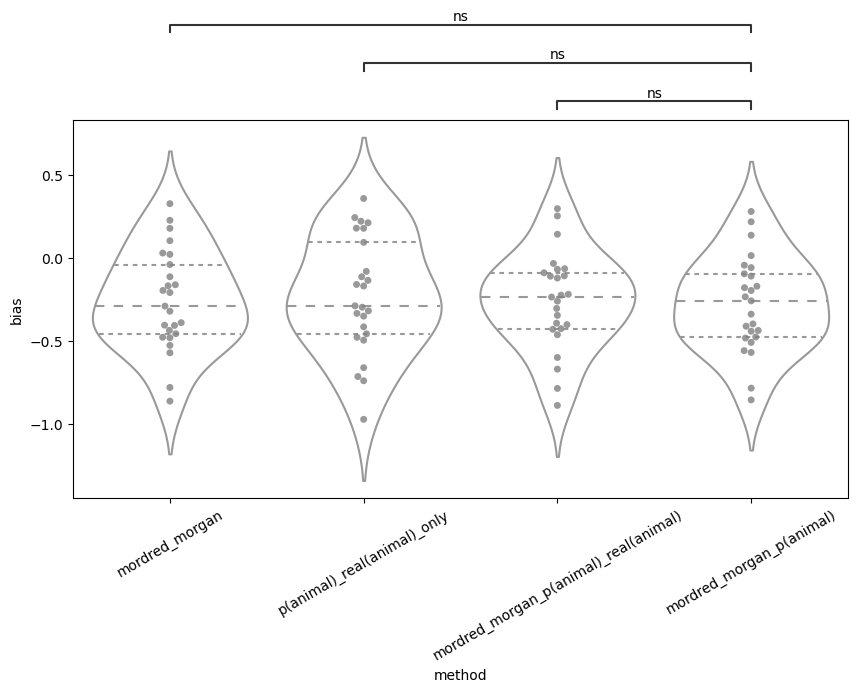

human_fup
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mordred_morgan_p(animal)_real(animal) vs. mordred_morgan_p(animal): t-test paired samples, P_val:9.605e-02 t=1.732e+00
p(animal)_real(animal)_only vs. mordred_morgan_p(animal): t-test paired samples, P_val:7.837e-01 t=-2.776e-01
mordred_morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:4.595e-04 t=4.054e+00


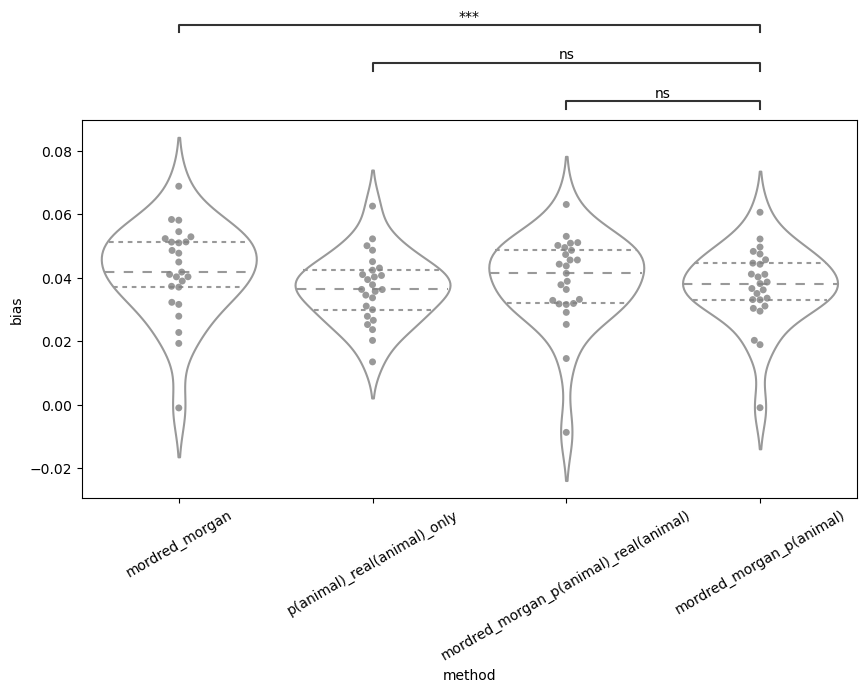

human_mrt
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mordred_morgan_p(animal)_real(animal) vs. mordred_morgan_p(animal): t-test paired samples, P_val:9.886e-02 t=-1.717e+00
p(animal)_real(animal)_only vs. mordred_morgan_p(animal): t-test paired samples, P_val:9.010e-01 t=-1.258e-01
mordred_morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:1.989e-01 t=-1.321e+00


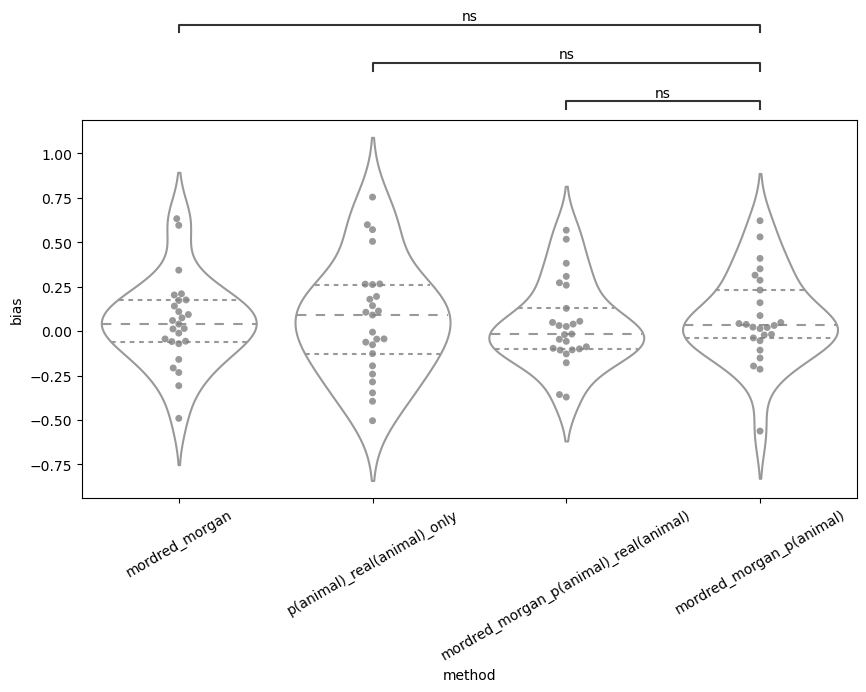

human_thalf
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mordred_morgan_p(animal)_real(animal) vs. mordred_morgan_p(animal): t-test paired samples, P_val:2.459e-01 t=-1.189e+00
p(animal)_real(animal)_only vs. mordred_morgan_p(animal): t-test paired samples, P_val:6.419e-02 t=-1.940e+00
mordred_morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:2.086e-02 t=-2.473e+00


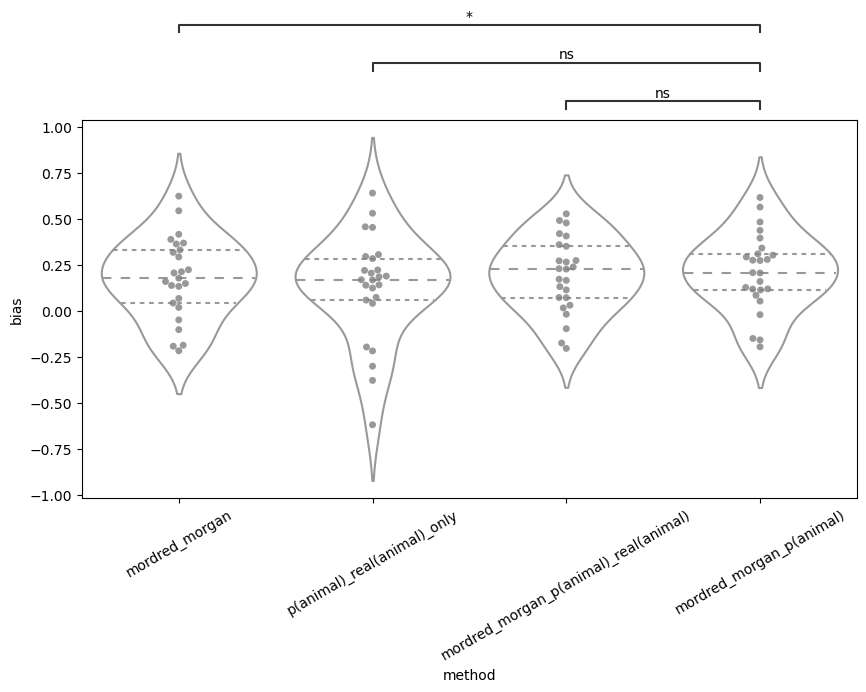

rmse
human_VDss_L_kg
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mordred_morgan_p(animal)_real(animal) vs. mordred_morgan_p(animal): t-test paired samples, P_val:9.543e-01 t=-5.789e-02
p(animal)_real(animal)_only vs. mordred_morgan_p(animal): t-test paired samples, P_val:1.894e-19 t=2.694e+01
mordred_morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:5.060e-07 t=6.789e+00


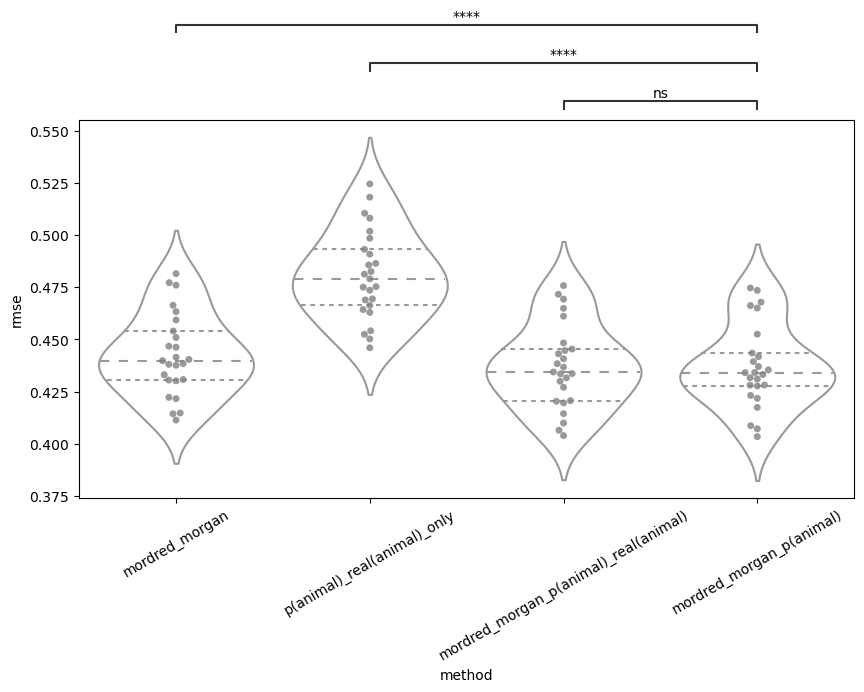

human_CL_mL_min_kg
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mordred_morgan_p(animal)_real(animal) vs. mordred_morgan_p(animal): t-test paired samples, P_val:7.522e-01 t=-3.193e-01
p(animal)_real(animal)_only vs. mordred_morgan_p(animal): t-test paired samples, P_val:1.801e-14 t=1.628e+01
mordred_morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:2.247e-04 t=4.336e+00


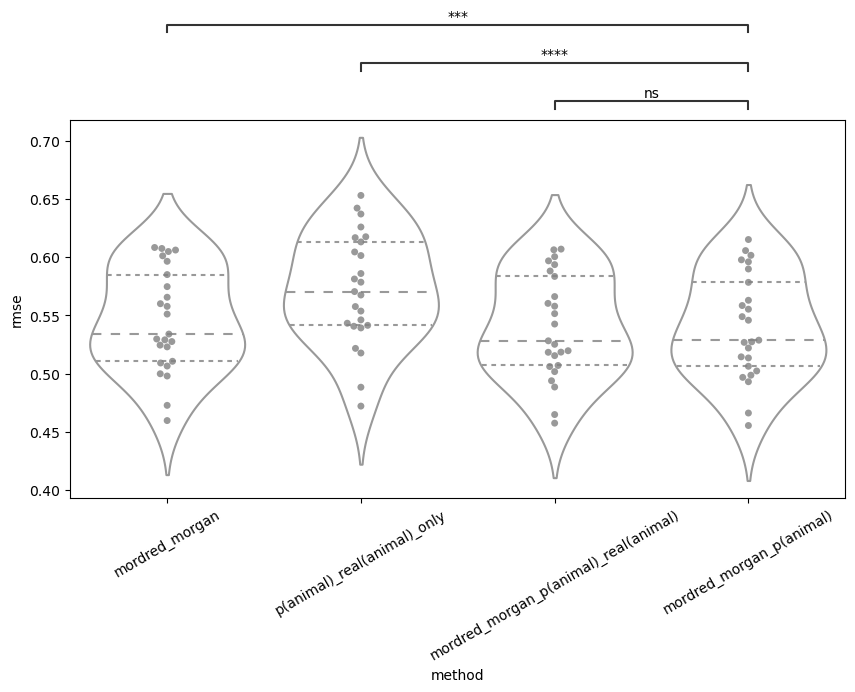

human_fup
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mordred_morgan_p(animal)_real(animal) vs. mordred_morgan_p(animal): t-test paired samples, P_val:5.800e-04 t=3.962e+00
p(animal)_real(animal)_only vs. mordred_morgan_p(animal): t-test paired samples, P_val:5.980e-08 t=7.714e+00
mordred_morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:1.828e-15 t=1.804e+01


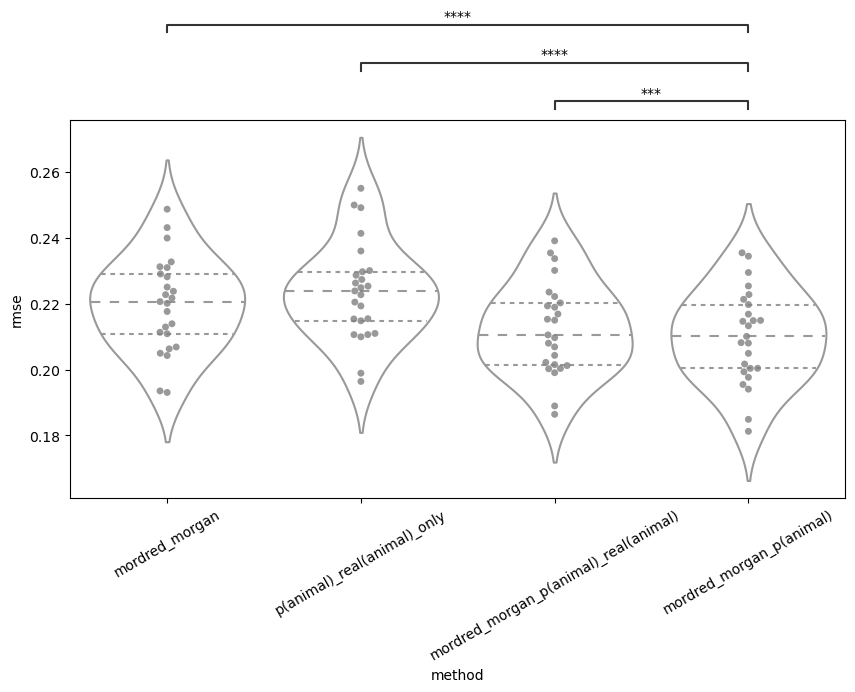

human_mrt
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mordred_morgan_p(animal)_real(animal) vs. mordred_morgan_p(animal): t-test paired samples, P_val:3.394e-01 t=9.747e-01
p(animal)_real(animal)_only vs. mordred_morgan_p(animal): t-test paired samples, P_val:1.909e-13 t=1.462e+01
mordred_morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:2.081e-02 t=2.474e+00


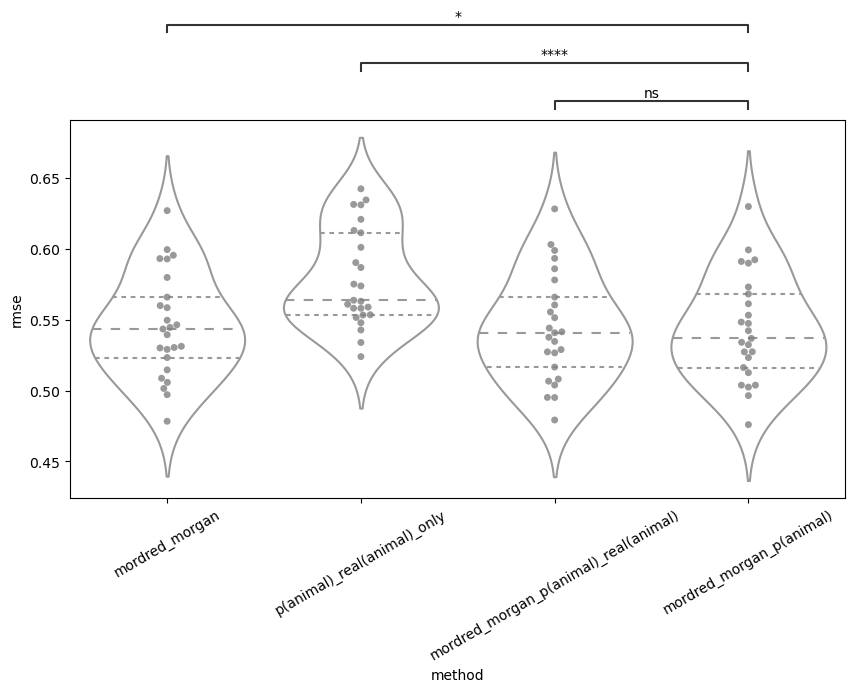

human_thalf
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mordred_morgan_p(animal)_real(animal) vs. mordred_morgan_p(animal): t-test paired samples, P_val:1.556e-01 t=1.466e+00
p(animal)_real(animal)_only vs. mordred_morgan_p(animal): t-test paired samples, P_val:3.759e-15 t=1.747e+01
mordred_morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:6.146e-06 t=5.761e+00


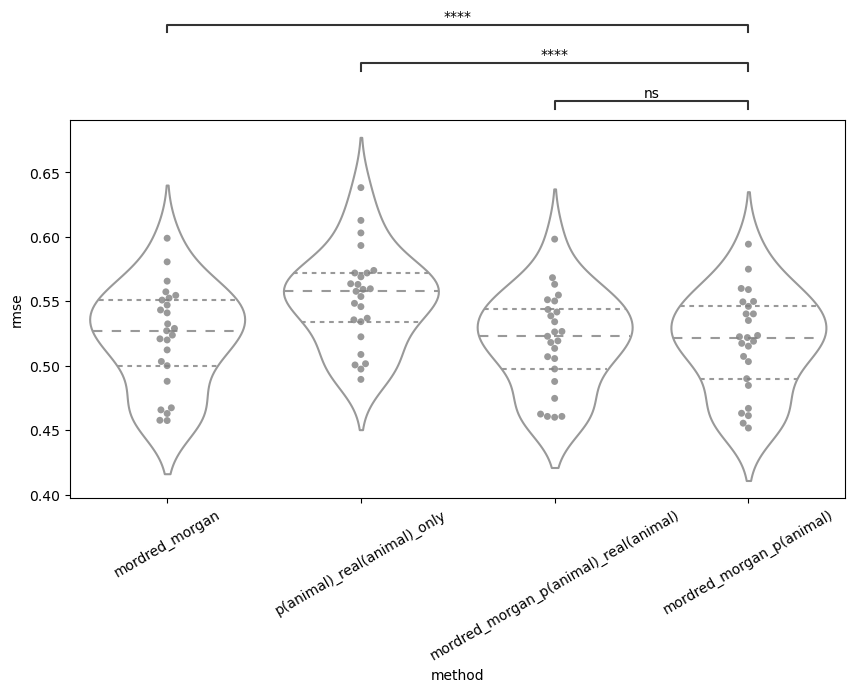

r2
human_VDss_L_kg
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mordred_morgan_p(animal)_real(animal) vs. mordred_morgan_p(animal): t-test paired samples, P_val:9.965e-01 t=4.428e-03
p(animal)_real(animal)_only vs. mordred_morgan_p(animal): t-test paired samples, P_val:2.010e-19 t=-2.687e+01
mordred_morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:8.840e-07 t=-6.555e+00


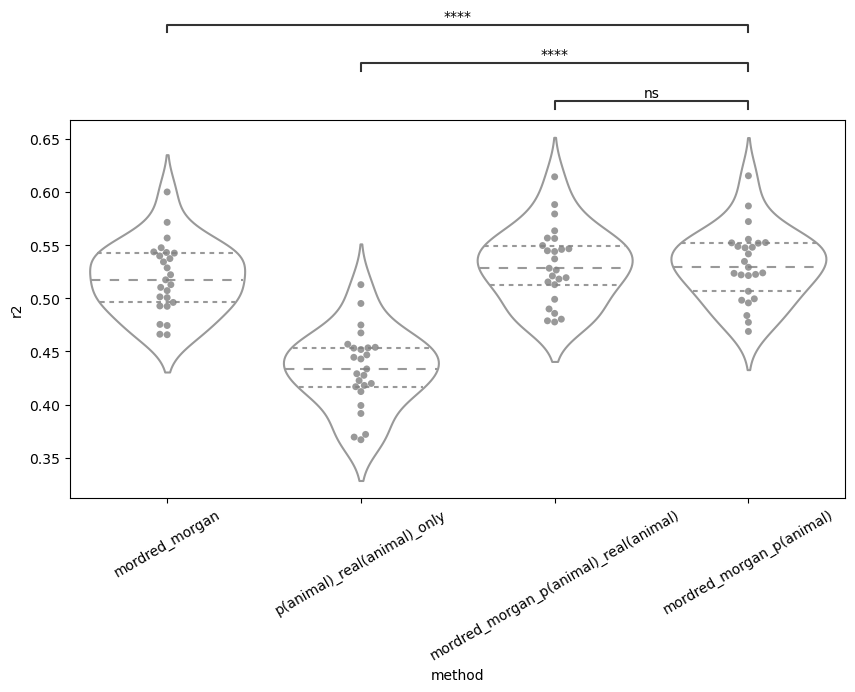

human_CL_mL_min_kg
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mordred_morgan_p(animal)_real(animal) vs. mordred_morgan_p(animal): t-test paired samples, P_val:7.693e-01 t=2.966e-01
p(animal)_real(animal)_only vs. mordred_morgan_p(animal): t-test paired samples, P_val:1.060e-14 t=-1.668e+01
mordred_morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:2.048e-04 t=-4.373e+00


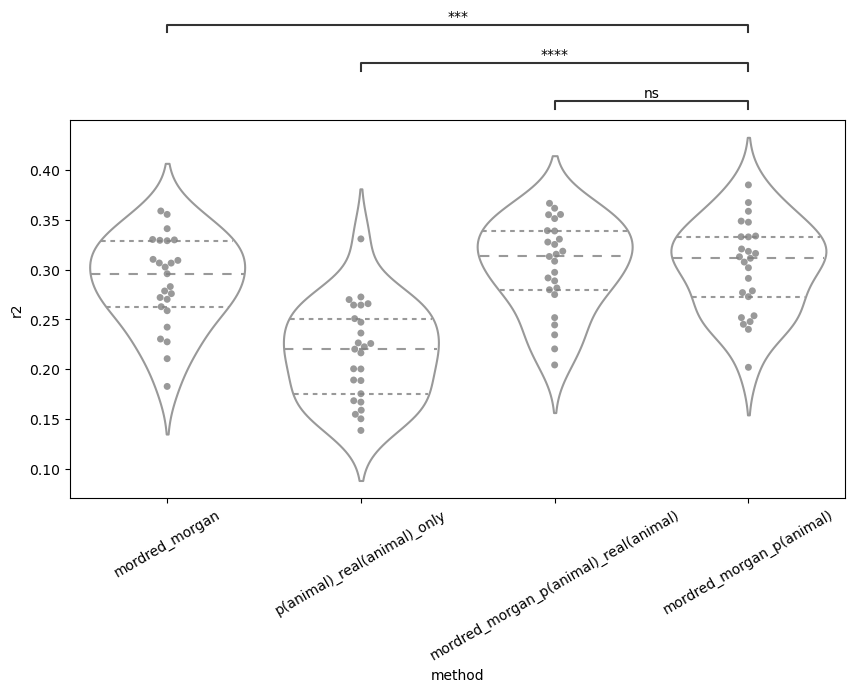

human_fup
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mordred_morgan_p(animal)_real(animal) vs. mordred_morgan_p(animal): t-test paired samples, P_val:4.500e-04 t=-4.062e+00
p(animal)_real(animal)_only vs. mordred_morgan_p(animal): t-test paired samples, P_val:7.308e-08 t=-7.625e+00
mordred_morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:1.709e-14 t=-1.632e+01


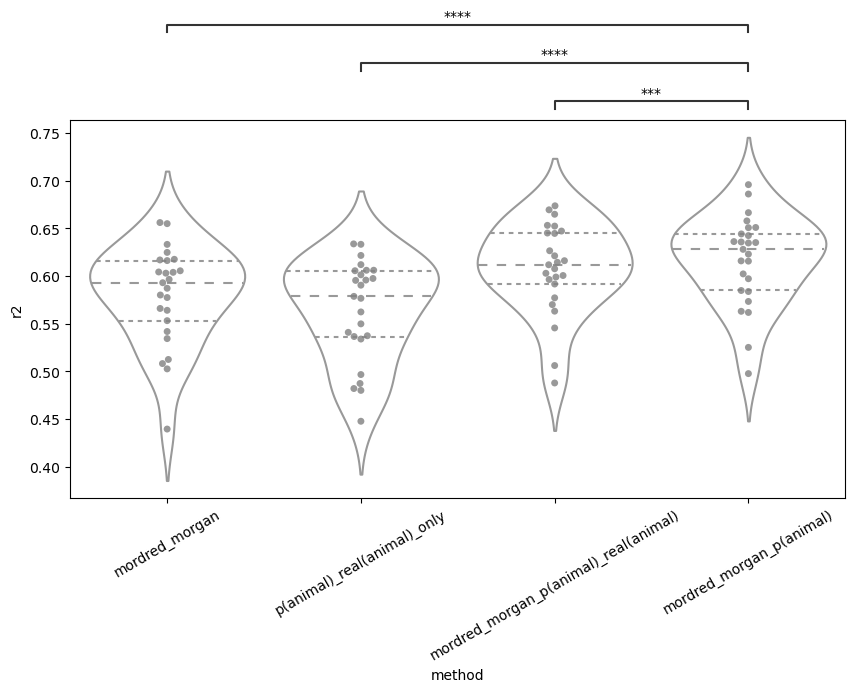

human_mrt
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mordred_morgan_p(animal)_real(animal) vs. mordred_morgan_p(animal): t-test paired samples, P_val:3.428e-01 t=-9.679e-01
p(animal)_real(animal)_only vs. mordred_morgan_p(animal): t-test paired samples, P_val:2.405e-13 t=-1.446e+01
mordred_morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:2.080e-02 t=-2.474e+00


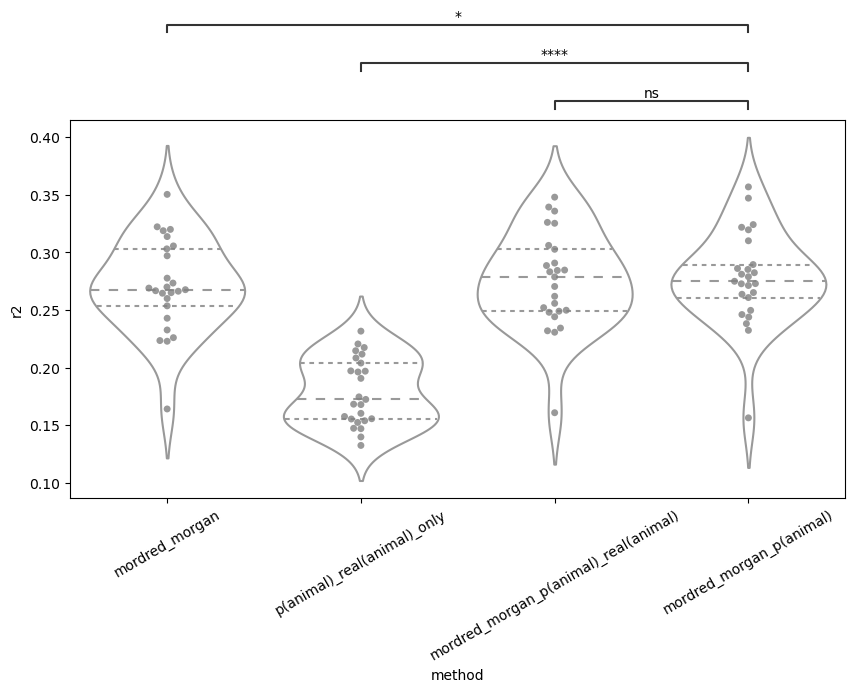

human_thalf
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mordred_morgan_p(animal)_real(animal) vs. mordred_morgan_p(animal): t-test paired samples, P_val:1.274e-01 t=-1.579e+00
p(animal)_real(animal)_only vs. mordred_morgan_p(animal): t-test paired samples, P_val:1.009e-14 t=-1.671e+01
mordred_morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:6.663e-06 t=-5.729e+00


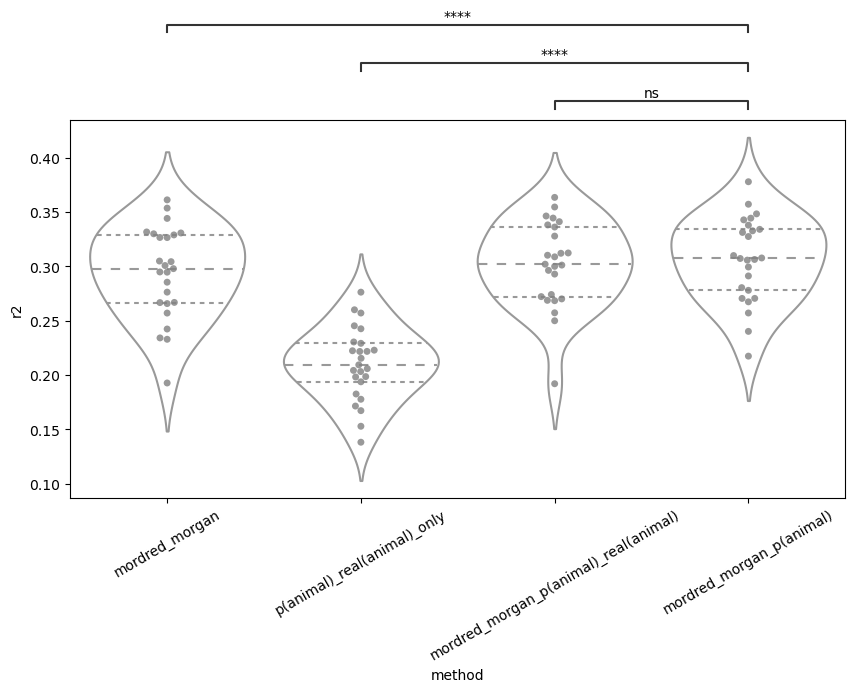

In [8]:
for metric in ["fold_2", "fold_3", "fold_5", "gmfe", "mfe", "bias", "rmse", "r2"]:

    print(metric)
    
    for endpoint in  ["human_VDss_L_kg","human_CL_mL_min_kg", "human_fup", "human_mrt", "human_thalf"]:

        print(endpoint)
        pairs= [('mordred_morgan_p(animal)', "mordred_morgan_p(animal)_real(animal)"),
               ('mordred_morgan_p(animal)', 'mordred_morgan'),
               ('mordred_morgan_p(animal)', 'p(animal)_real(animal)_only')]

        my_order= ["mordred_morgan",
                   "p(animal)_real(animal)_only",
                  "mordred_morgan_p(animal)_real(animal)",
                   "mordred_morgan_p(animal)",
                   ]


        fig, ax = plt.subplots(figsize=(10, 5), dpi=100)

        g = sns.violinplot(ax=ax,x='method', y=metric, data=df[df["endpoint"]==endpoint], scale='width', inner='quartile', order=my_order, color="white")
        g = sns.swarmplot(ax=ax,x='method', y=metric, data=df[df["endpoint"]==endpoint], order=my_order,color="grey", alpha=0.8)
        g.set_xticklabels(g.get_xticklabels(), rotation=30)        
        
        annotator = Annotator(ax=ax, pairs = pairs, data=df[df["endpoint"]==endpoint], x="method", y=metric, order=my_order)
        annotator.configure(test='t-test_paired', text_format='star', loc='outside')
        annotator.apply_and_annotate()

        plt.show()


gmfe
human_VDss_L_kg
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mordred_morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:2.014e-06 t=6.215e+00
p(animal)_real(animal)_only vs. mordred_morgan_p(animal): t-test paired samples, P_val:4.794e-17 t=2.119e+01
mordred vs. mordred_morgan_p(animal): t-test paired samples, P_val:1.387e-07 t=7.344e+00
morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:1.199e-12 t=1.342e+01


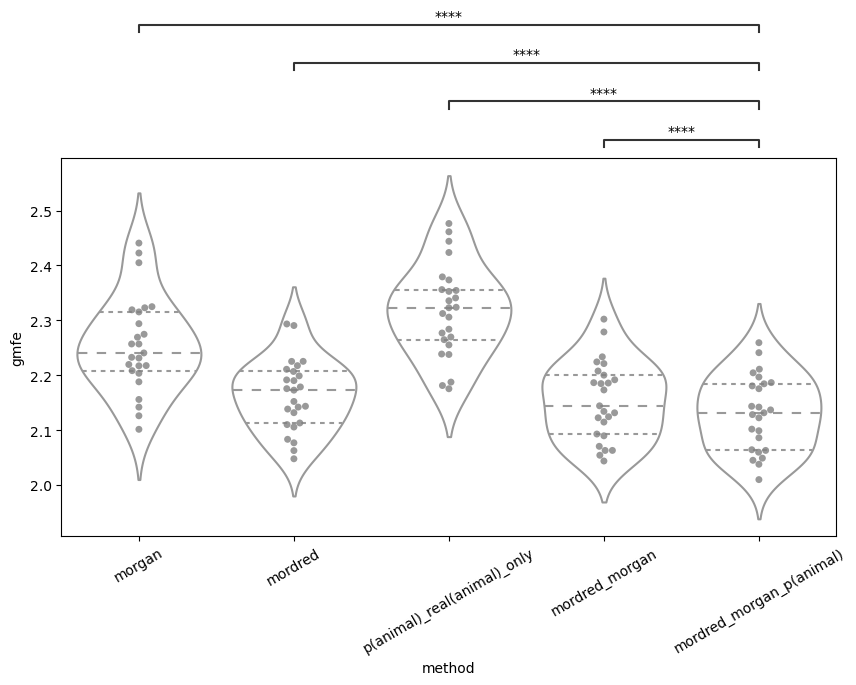

human_CL_mL_min_kg
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mordred_morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:1.534e-07 t=7.300e+00
p(animal)_real(animal)_only vs. mordred_morgan_p(animal): t-test paired samples, P_val:2.844e-12 t=1.288e+01
mordred vs. mordred_morgan_p(animal): t-test paired samples, P_val:9.992e-10 t=9.641e+00
morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:4.266e-07 t=6.862e+00


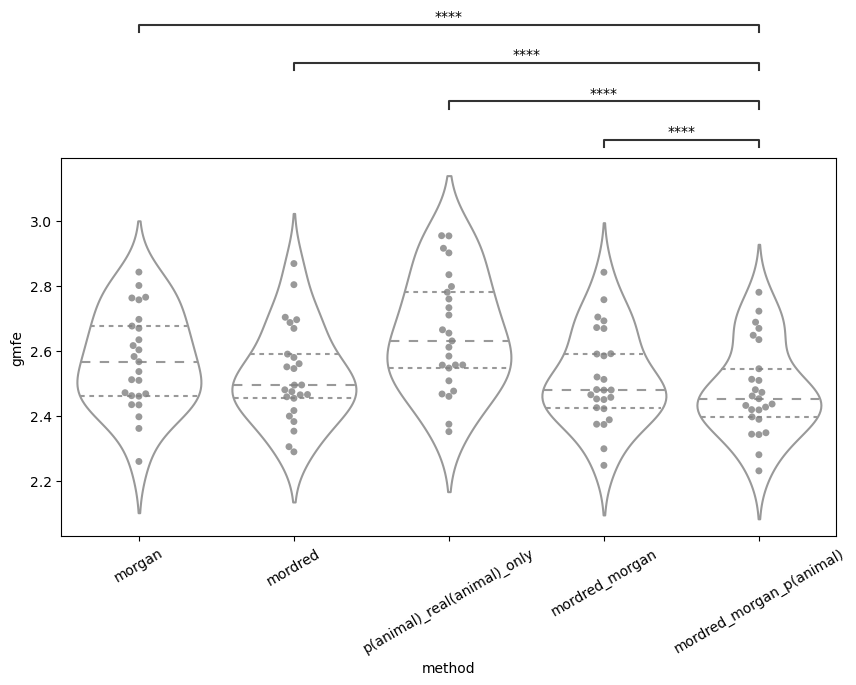

human_fup
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mordred_morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:2.130e-14 t=1.616e+01
p(animal)_real(animal)_only vs. mordred_morgan_p(animal): t-test paired samples, P_val:1.344e-01 t=1.549e+00
mordred vs. mordred_morgan_p(animal): t-test paired samples, P_val:1.226e-11 t=1.201e+01
morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:2.329e-22 t=3.586e+01


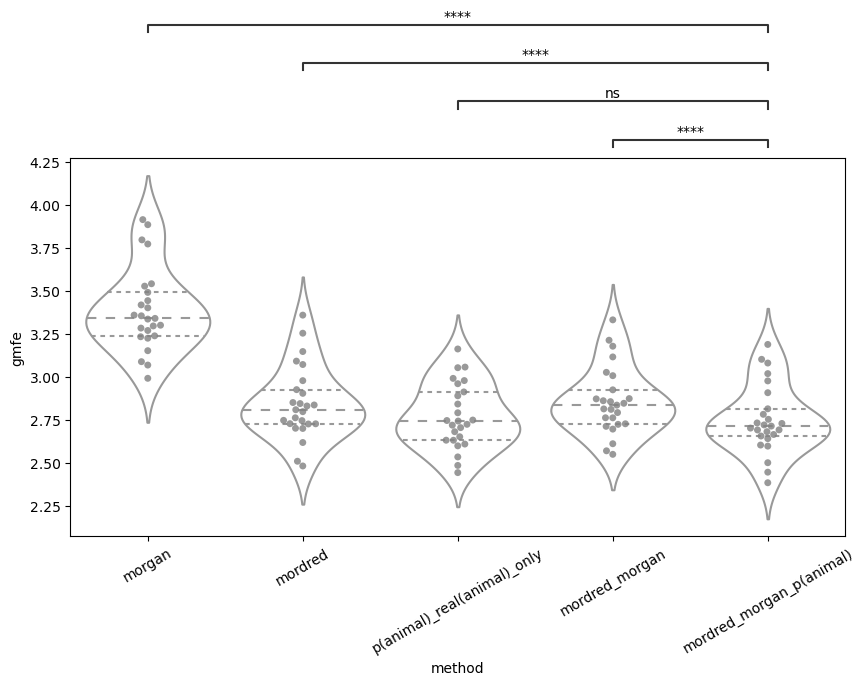

human_mrt
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mordred_morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:1.756e-03 t=3.519e+00
p(animal)_real(animal)_only vs. mordred_morgan_p(animal): t-test paired samples, P_val:1.342e-14 t=1.650e+01
mordred vs. mordred_morgan_p(animal): t-test paired samples, P_val:4.577e-06 t=5.880e+00
morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:8.383e-08 t=7.564e+00


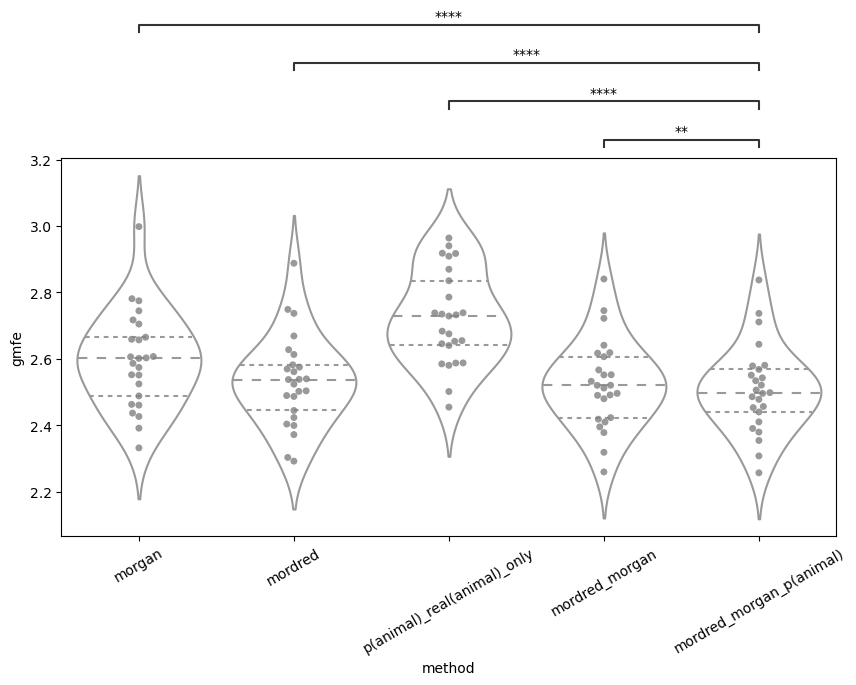

human_thalf
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mordred_morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:6.015e-04 t=3.948e+00
p(animal)_real(animal)_only vs. mordred_morgan_p(animal): t-test paired samples, P_val:1.515e-17 t=2.229e+01
mordred vs. mordred_morgan_p(animal): t-test paired samples, P_val:4.364e-05 t=4.981e+00
morgan vs. mordred_morgan_p(animal): t-test paired samples, P_val:8.067e-13 t=1.367e+01


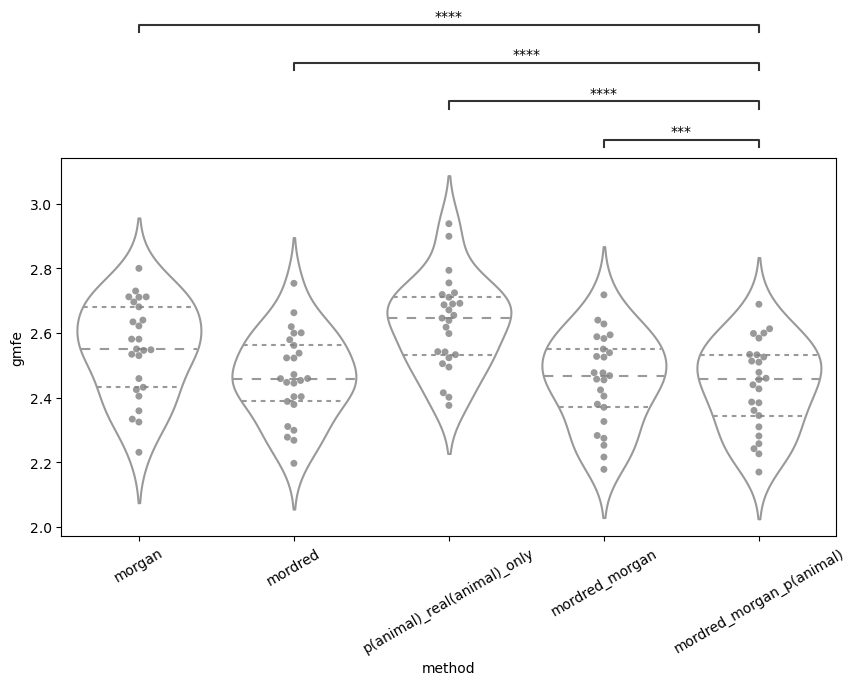

In [9]:
for metric in ["gmfe"]:

    print(metric)
    
    for endpoint in  ["human_VDss_L_kg","human_CL_mL_min_kg", "human_fup", "human_mrt", "human_thalf"]:

        print(endpoint)
        pairs= [ 
               ("mordred_morgan_p(animal)", "p(animal)_real(animal)_only"),
               ("mordred_morgan_p(animal)", "mordred_morgan"),
               ("mordred_morgan_p(animal)", "morgan"),
               ("mordred_morgan_p(animal)", "mordred")]

        my_order= ["morgan", "mordred", "p(animal)_real(animal)_only", 
                   "mordred_morgan", "mordred_morgan_p(animal)"]


        fig, ax = plt.subplots(figsize=(10, 5), dpi=100)

        g = sns.violinplot(ax=ax,x='method', y=metric, data=df[df["endpoint"]==endpoint], scale='width', inner='quartile', order=my_order, color="white")
        g = sns.swarmplot(ax=ax,x='method', y=metric, data=df[df["endpoint"]==endpoint], order=my_order,color="grey", alpha=0.8)
        g.set_xticklabels(g.get_xticklabels(), rotation=30)        
        
        annotator = Annotator(ax=ax, pairs = pairs, data=df[df["endpoint"]==endpoint], x="method", y=metric, order=my_order)
        annotator.configure(test='t-test_paired', text_format='star', loc='outside')
        annotator.apply_and_annotate()

        plt.show()
